차선 영역 내에서 정상 차선과 훼손 차선을 구분하는 다중 클래스 세그멘테이션 모델을 만들고, 이때 클래스는 정상 차선, 훼손 차선, 그 외 부분의 3가지가 될 것입니다.

그리고 차선에서 훼손된 차선 부분의 비중이 몇 % 차지하는지 찾아내면 됩니다.

In [1]:
import tensorflow.compat.v1 as tf1
# import tensorflow as tf2
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = tf1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
session = tf1.Session(config=config)

2024-06-16 07:02:34.771277: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-16 07:02:35.049401: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-16 07:02:36.558054: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-06-16 07:02:36.558217: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

## Json to CSV 라벨 전처리 작업

In [21]:
import os
import json
import csv

def json_to_csv(json_file, csv_writer):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)

    for shape in data['shapes']:
        label = shape['label']
        points = shape['points']

        
        points_str = ';'.join([f'({x},{y})' for x, y in points])

        csv_writer.writerow([os.path.basename(json_file), label, points_str])

def convert_jsons_to_csv(json_dir, csv_file):
    with open(csv_file, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['file', 'label', 'points'])  

        json_files = [os.path.join(json_dir, file) for file in os.listdir(json_dir) if file.endswith('.json')]

        for json_file in json_files:
            json_to_csv(json_file, writer)

if __name__ == '__main__':
    json_directory = '/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/F'
    output_csv_file = 'Foutput.csv'

    convert_jsons_to_csv(json_directory, output_csv_file)

    print(f'CSV 파일이 생성되었습니다: {output_csv_file}')


CSV 파일이 생성되었습니다: Foutput.csv


In [33]:
df1 = pd.read_csv('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/A.csv')
df2 = pd.read_csv('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/C.csv')
df3 = pd.read_csv('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/F.csv')

In [45]:
df1.loc[df1['label'] == 'A', 'label'] = 2
df2.loc[df2['label'] == 'C', 'label'] = 2
df3.loc[df3['label'] == 'F', 'label'] = 2

In [50]:
combined_df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
combined_df

,file,label,points
0,1Liniya 1id181_5110.json,2,"(10.708502024291516,11.510121457489877);(32.97..."
1,1Liniya 1id181_5108.json,2,"(12.717213114754088,10.278688524590159);(35.46..."
2,1Liniya 1id181_5114.json,2,"(7.490936555891243,8.516616314199396);(29.0921..."
3,1Liniya 1id181_5116.json,2,"(8.104815864022667,7.814447592067989);(30.7677..."
4,1Liniya 1id181_5118.json,2,"(4.767253044654941,9.434370771312587);(27.9066..."
...,...,...,...
1111,Liniya 1id695_8237.json,1,"(162.66831683168317,89.75742574257426);(164.64..."
1112,Liniya 1id695_8237.json,1,"(134.94554455445544,77.67821782178218);(144.05..."
1113,Liniya 1id695_8237.json,1,"(212.56930693069307,46.39108910891089);(208.01..."
1114,Liniya 1id695_8237.json,1,"(173.55940594059405,45.4009900990099);(177.915..."


In [54]:
combined_df['file'] = combined_df['file'].str.replace('.json', '.png', regex=True)
combined_df

,file,label,points
0,1Liniya 1id181_5110.png,2,"(10.708502024291516,11.510121457489877);(32.97..."
1,1Liniya 1id181_5108.png,2,"(12.717213114754088,10.278688524590159);(35.46..."
2,1Liniya 1id181_5114.png,2,"(7.490936555891243,8.516616314199396);(29.0921..."
3,1Liniya 1id181_5116.png,2,"(8.104815864022667,7.814447592067989);(30.7677..."
4,1Liniya 1id181_5118.png,2,"(4.767253044654941,9.434370771312587);(27.9066..."
...,...,...,...
1111,Liniya 1id695_8237.png,1,"(162.66831683168317,89.75742574257426);(164.64..."
1112,Liniya 1id695_8237.png,1,"(134.94554455445544,77.67821782178218);(144.05..."
1113,Liniya 1id695_8237.png,1,"(212.56930693069307,46.39108910891089);(208.01..."
1114,Liniya 1id695_8237.png,1,"(173.55940594059405,45.4009900990099);(177.915..."


In [55]:
combined_df.to_csv('total.csv', index=False)

# Image 전처리 작업

In [27]:
df = pd.read_csv('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/total.csv')
df

,file,label,points
0,1Liniya 1id181_5110.png,2,"(10.708502024291516,11.510121457489877);(32.97..."
1,1Liniya 1id181_5108.png,2,"(12.717213114754088,10.278688524590159);(35.46..."
2,1Liniya 1id181_5114.png,2,"(7.490936555891243,8.516616314199396);(29.0921..."
3,1Liniya 1id181_5116.png,2,"(8.104815864022667,7.814447592067989);(30.7677..."
4,1Liniya 1id181_5118.png,2,"(4.767253044654941,9.434370771312587);(27.9066..."
...,...,...,...
1111,Liniya 1id695_8237.png,1,"(162.66831683168317,89.75742574257426);(164.64..."
1112,Liniya 1id695_8237.png,1,"(134.94554455445544,77.67821782178218);(144.05..."
1113,Liniya 1id695_8237.png,1,"(212.56930693069307,46.39108910891089);(208.01..."
1114,Liniya 1id695_8237.png,1,"(173.55940594059405,45.4009900990099);(177.915..."


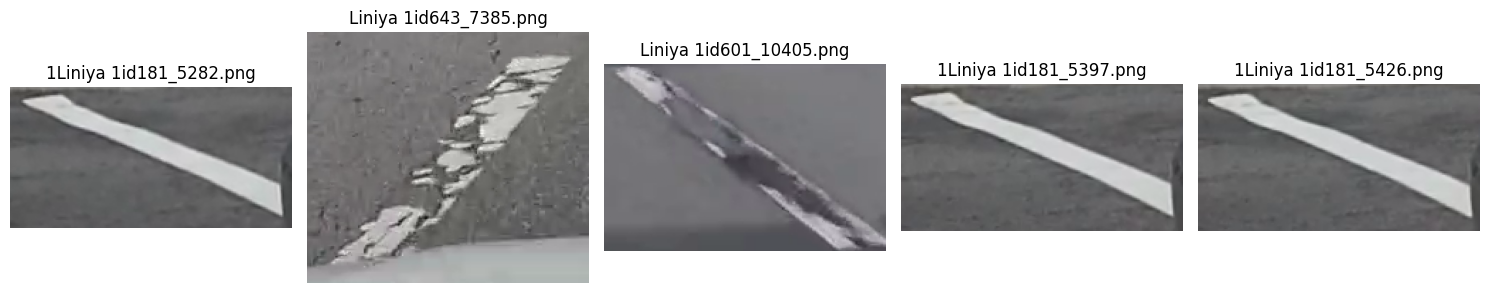

In [58]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

image_path = '/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/total'

png_files = [f for f in os.listdir(image_path) if f.endswith('.png')]

random_files = random.sample(png_files, 5)


plt.figure(figsize=(15, 8))
for i, file_name in enumerate(random_files, 1):
    file_path = os.path.join(image_path, file_name)
    image = imread(file_path)
    
    plt.subplot(1, 5, i)
    plt.imshow(image)
    plt.title(file_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

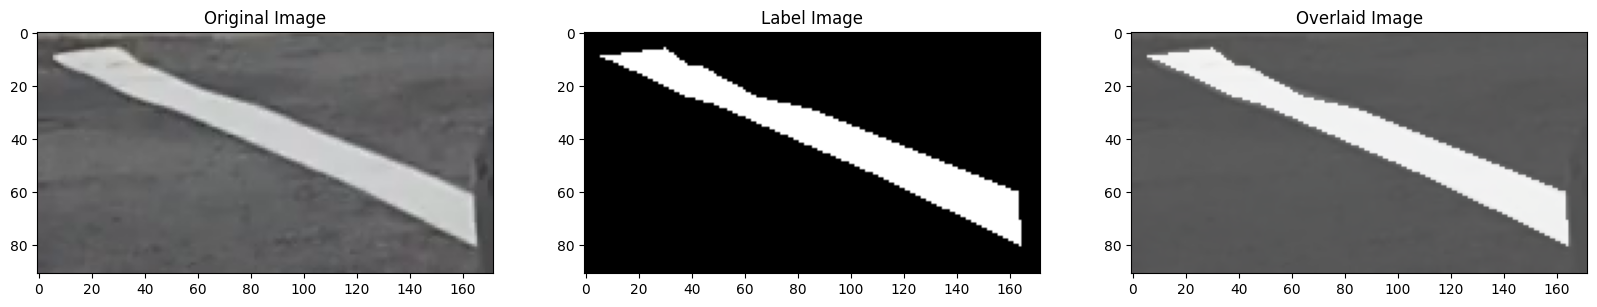

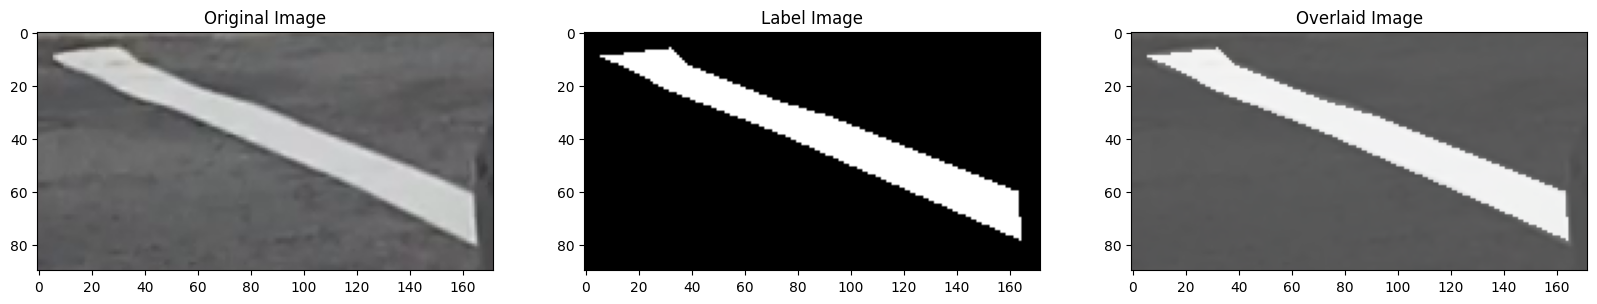

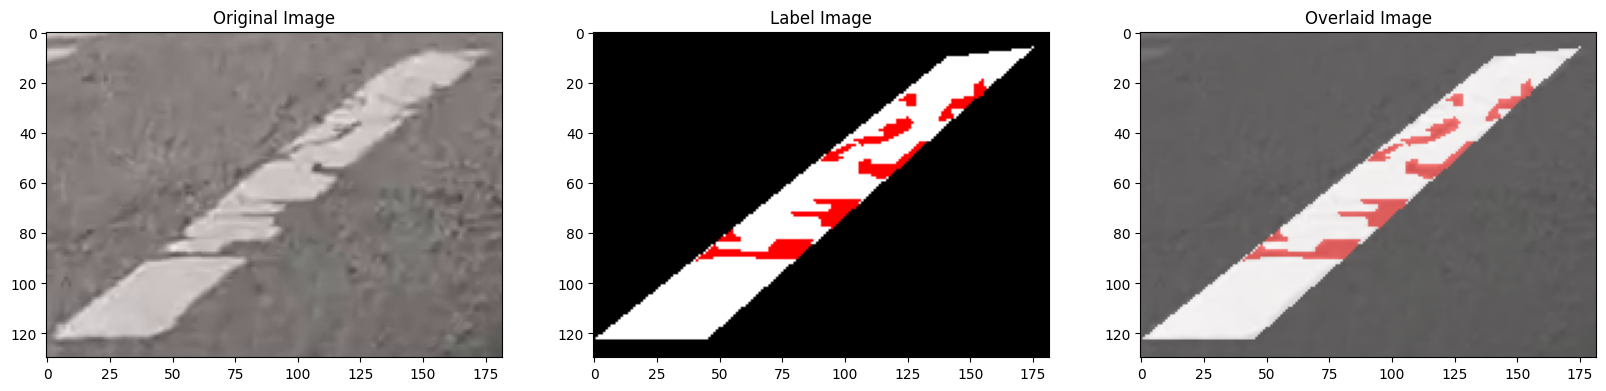

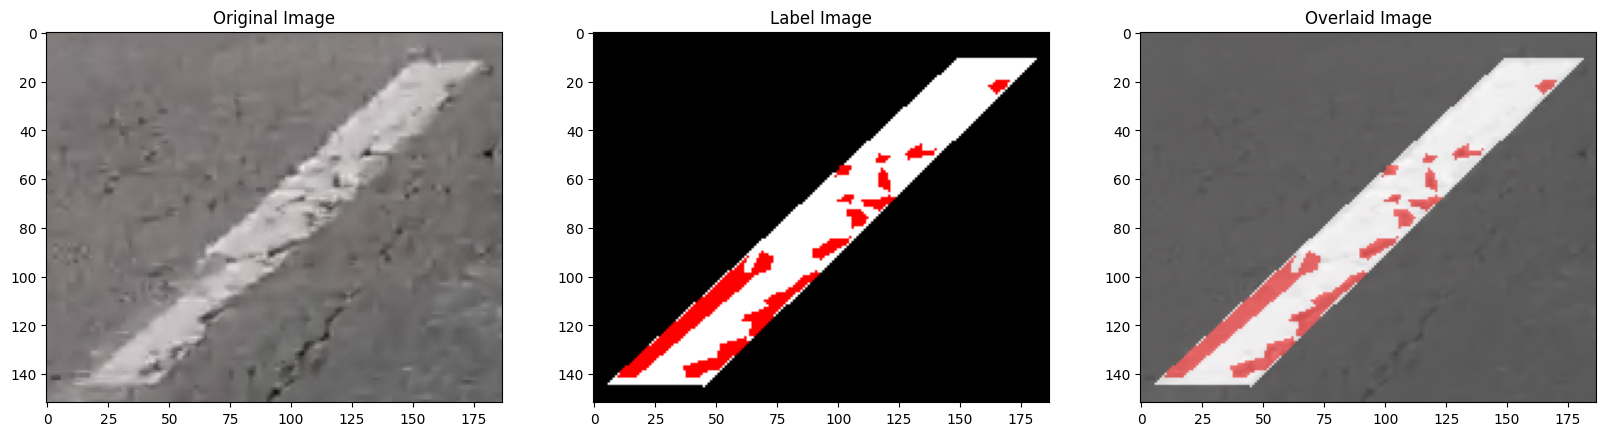

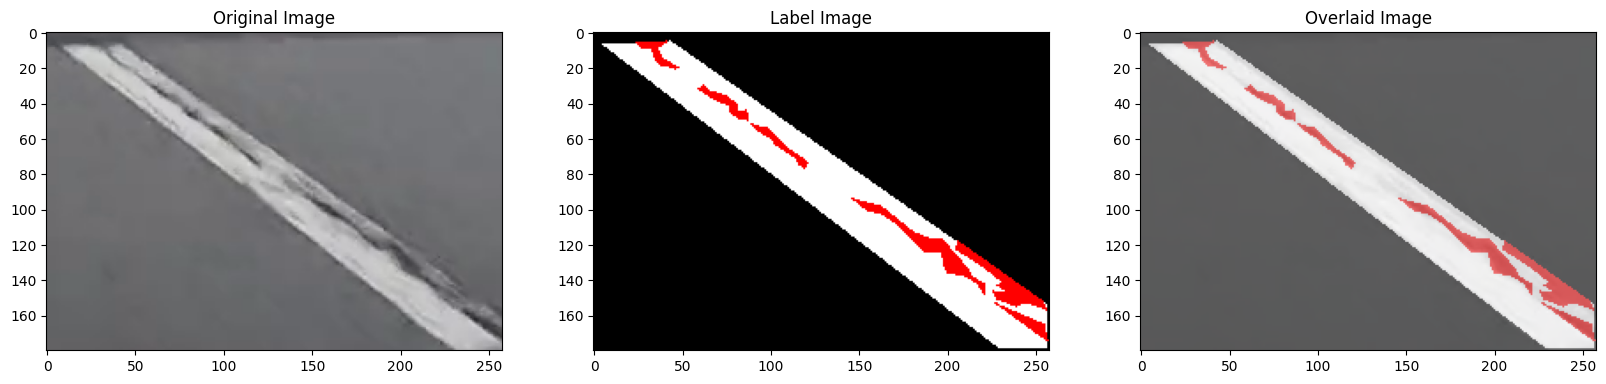

In [83]:
import random

file_dict = defaultdict(list)
for i, file in enumerate(df['file']):
    file_dict[file].append(i)

selected_files = random.sample(list(file_dict.keys()), 5)

for file in selected_files:
    indices = file_dict[file]
    img_path = '/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/total/' + file
    img = Image.open(img_path)
    label_img = Image.new('RGB', img.size, (0, 0, 0))
    draw = ImageDraw.Draw(label_img)

    for idx in indices:
        label_list = [int(x) for x in str(df['label'][idx]).split(',')]
        points_list = df['points'][idx].split(';')

        for label in label_list:
            points = []
            for point in points_list:
                x, y = map(float, point.strip('()').split(','))
                points.append((int(x), int(y)))

            if label == 2:
                draw.polygon(points, fill=(255, 255, 255))
            elif label == 1:
                draw.polygon(points, fill=(255, 0, 0))
            else:
                draw.polygon(points, fill=(0, 0, 0))

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))

    ax[0].imshow(img)
    ax[0].set_title('Original Image')

    ax[1].imshow(np.array(label_img))
    ax[1].set_title('Label Image')

    ax[2].imshow(img, alpha=0.5, cmap='gray')
    ax[2].imshow(np.array(label_img), alpha=0.5)
    ax[2].set_title('Overlaid Image')

    plt.show()

In [94]:
df

,file,label,points
0,1Liniya 1id181_5110.png,2,"(10.708502024291516,11.510121457489877);(32.97..."
1,1Liniya 1id181_5108.png,2,"(12.717213114754088,10.278688524590159);(35.46..."
2,1Liniya 1id181_5114.png,2,"(7.490936555891243,8.516616314199396);(29.0921..."
3,1Liniya 1id181_5116.png,2,"(8.104815864022667,7.814447592067989);(30.7677..."
4,1Liniya 1id181_5118.png,2,"(4.767253044654941,9.434370771312587);(27.9066..."
...,...,...,...
1111,Liniya 1id695_8237.png,1,"(162.66831683168317,89.75742574257426);(164.64..."
1112,Liniya 1id695_8237.png,1,"(134.94554455445544,77.67821782178218);(144.05..."
1113,Liniya 1id695_8237.png,1,"(212.56930693069307,46.39108910891089);(208.01..."
1114,Liniya 1id695_8237.png,1,"(173.55940594059405,45.4009900990099);(177.915..."


In [45]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import ast

def resize_image(img, size=(100, 100)):
    return cv2.resize(img, size, interpolation=cv2.INTER_AREA)

def resize_label_coords(coords, old_size, new_size):
    x_scale = new_size[0] / old_size[0]
    y_scale = new_size[1] / old_size[1]
    return [(int(x * x_scale), int(y * y_scale)) for x, y in coords]

def parse_points(points_str):
    points_str = points_str.replace('(', '').replace(')', '').replace(';', ',')
    points = [tuple(map(float, point.split(','))) for point in points_str.split(',')]
    return points

image_dir = '/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/total'
labeling_csv_path = '/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/total.csv'
img_save_path = '/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/images.npy'
label_save_path = '/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/labels.npy'

labeling_data = pd.read_csv(labeling_csv_path)
all_images = []
all_labels = []

for filename in labeling_data['file'].unique():
    image_path = os.path.join(image_dir, filename)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image_label = labeling_data[labeling_data['file'] == filename]

    label_mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

    for _, row in image_label.iterrows():
        label = row['label']
        points = parse_points(row['points'])
        points = np.array(points).reshape((-1, 2)).astype(np.int32)

        if label == 2:  # 차선 부분
            cv2.fillPoly(label_mask, [points], 2)
        elif label == 1:  # 훼손된 차선
            cv2.fillPoly(label_mask, [points], 1)
        else:  # 그 외 나머지
            cv2.fillPoly(label_mask, [points], 0)

    resized_image = resize_image(image)
    resized_label = resize_image(label_mask, size=resized_image.shape[:2])

    all_images.append(resized_image)
    all_labels.append(resized_label)

np.save(img_save_path, np.array(all_images))
np.save(label_save_path, np.array(all_labels))


In [112]:
import numpy as np

img_save_path = '/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/images.npy'
labels_save_path = '/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/labels.npy'

X = np.load(img_save_path)
y = np.load(labels_save_path)

print(f"Images shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Images shape: (376, 100, 100, 3)
Labels shape: (376, 100, 100)


In [113]:
y[0:250][y[0:250] == 1] = 2

In [131]:

unique_values, counts = np.unique(y[375], return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 8224
Value: 1, Count: 428
Value: 2, Count: 1348


## image augmentation

In [133]:
import cv2
import numpy as np

def augment_images_and_labels(X, y, rotation_interval_1=45, rotation_interval_2=15):
    augmented_X = []
    augmented_y = []

    # 0 ~ 249 인덱스 증강
    for i in range(250):
        image = X[i]
        label = y[i]

        for angle in range(0, 360, rotation_interval_1):
            rotated_image = rotate_image(image, angle)
            rotated_label = rotate_image(label, angle)

            augmented_X.append(rotated_image)
            augmented_y.append(rotated_label)

    # 250 ~ 375 인덱스 증강
    for i in range(250, 376):
        image = X[i]
        label = y[i]

        for angle in range(0, 360, rotation_interval_2):
            rotated_image = rotate_image(image, angle)
            rotated_label = rotate_image(label, angle)

            augmented_X.append(rotated_image)
            augmented_y.append(rotated_label)

    augmented_X = np.array(augmented_X)
    augmented_y = np.array(augmented_y)

    return augmented_X, augmented_y

def rotate_image(image, angle):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), flags=cv2.INTER_LINEAR)
    return rotated_image


X[0] 부터 X[249], y[0] 부터 y[249]: 8개 * 250 = 2,000개
X[250] 부터 X[375], y[250] 부터 y[375]: 24개 * 126 = 3,024개
총 개수: 2,000 + 3,024 = 5,024개

In [137]:
X_data, y_data = augment_images_and_labels(X, y)

In [138]:
print(f"X_data shape: {X_data.shape}")
print(f"y_data shape: {y_data.shape}")

X_data shape: (5024, 100, 100, 3)
y_data shape: (5024, 100, 100)


In [168]:
for i in range(2000):
    unique_values, counts = np.unique(y_data[i], return_counts=True)
    
    for value, count in zip(unique_values, counts):
        print(f"Value: {value}, Count: {count}")


Value: 0, Count: 9308
Value: 2, Count: 692
Value: 0, Count: 9367
Value: 1, Count: 77
Value: 2, Count: 556
Value: 0, Count: 9308
Value: 2, Count: 692
Value: 0, Count: 9375
Value: 1, Count: 77
Value: 2, Count: 548
Value: 0, Count: 9308
Value: 2, Count: 692
Value: 0, Count: 9375
Value: 1, Count: 77
Value: 2, Count: 548
Value: 0, Count: 9308
Value: 2, Count: 692
Value: 0, Count: 9367
Value: 1, Count: 77
Value: 2, Count: 556
Value: 0, Count: 9344
Value: 2, Count: 656
Value: 0, Count: 9402
Value: 1, Count: 75
Value: 2, Count: 523
Value: 0, Count: 9344
Value: 2, Count: 656
Value: 0, Count: 9410
Value: 1, Count: 75
Value: 2, Count: 515
Value: 0, Count: 9344
Value: 2, Count: 656
Value: 0, Count: 9410
Value: 1, Count: 75
Value: 2, Count: 515
Value: 0, Count: 9344
Value: 2, Count: 656
Value: 0, Count: 9402
Value: 1, Count: 75
Value: 2, Count: 523
Value: 0, Count: 8775
Value: 2, Count: 1225
Value: 0, Count: 8837
Value: 1, Count: 116
Value: 2, Count: 1047
Value: 0, Count: 8775
Value: 2, Count: 1225

In [186]:
y_data[0:2000][y_data[0:2000] == 1] = 2

In [190]:
unique_values, counts = np.unique(y_data[2000], return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 6252
Value: 1, Count: 501
Value: 2, Count: 3247


In [191]:
np.save('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/X_data_aug.npy', X_data)
np.save('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/y_data_aug.npy', y_data)

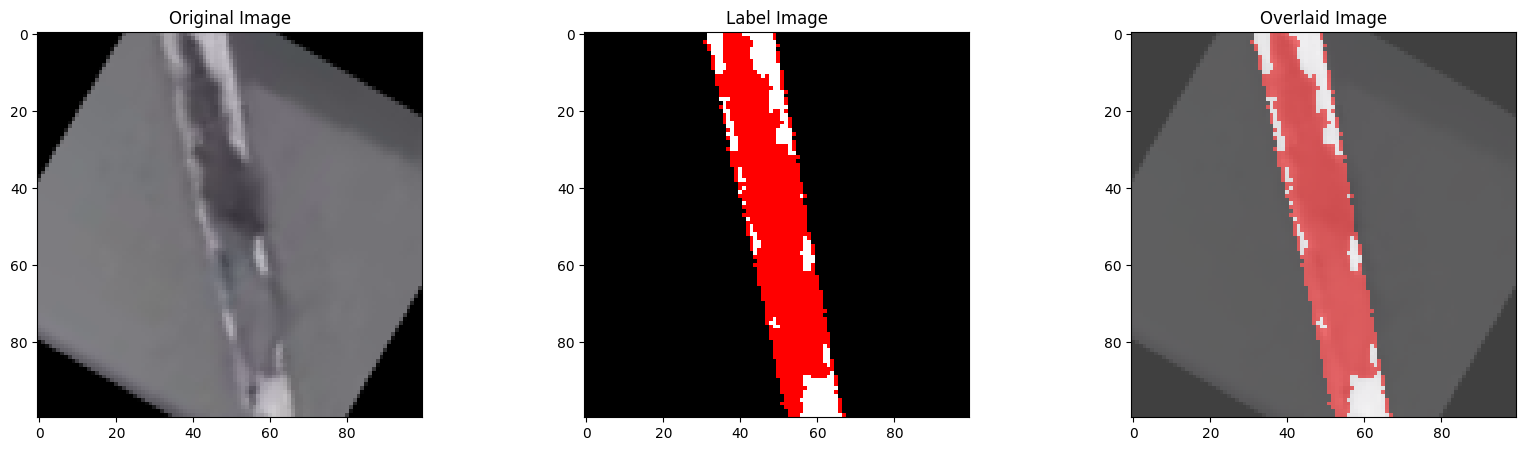

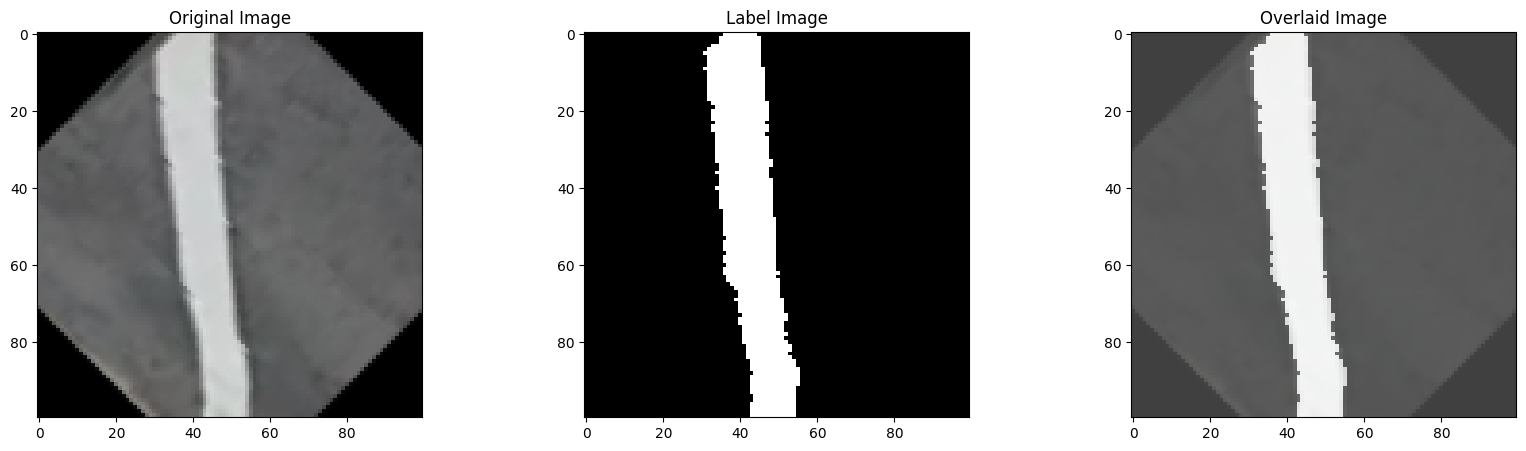

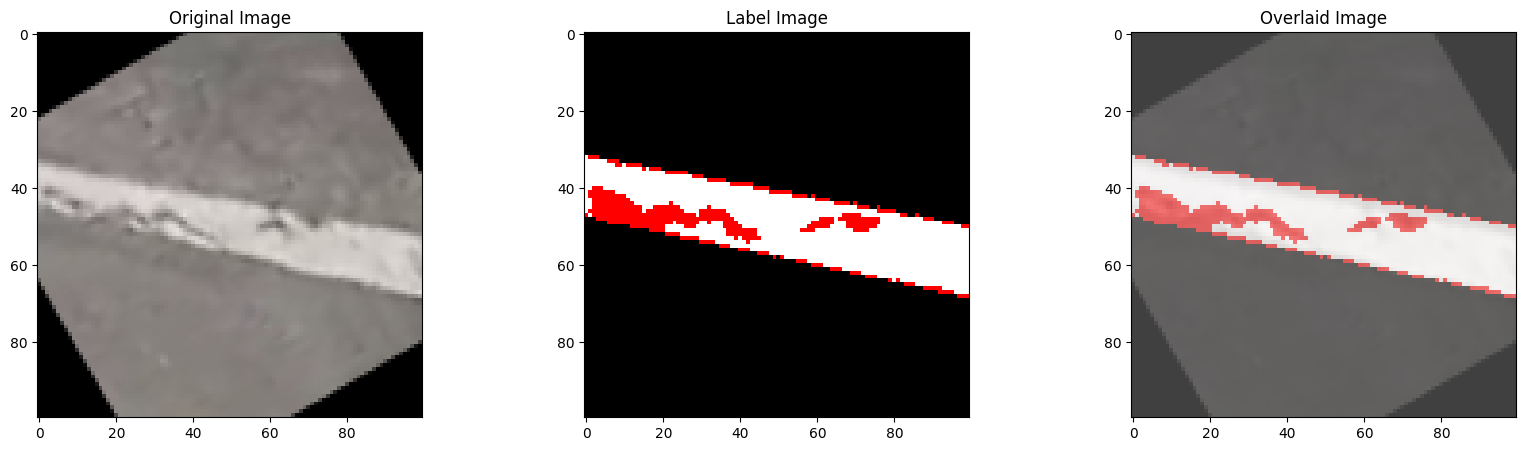

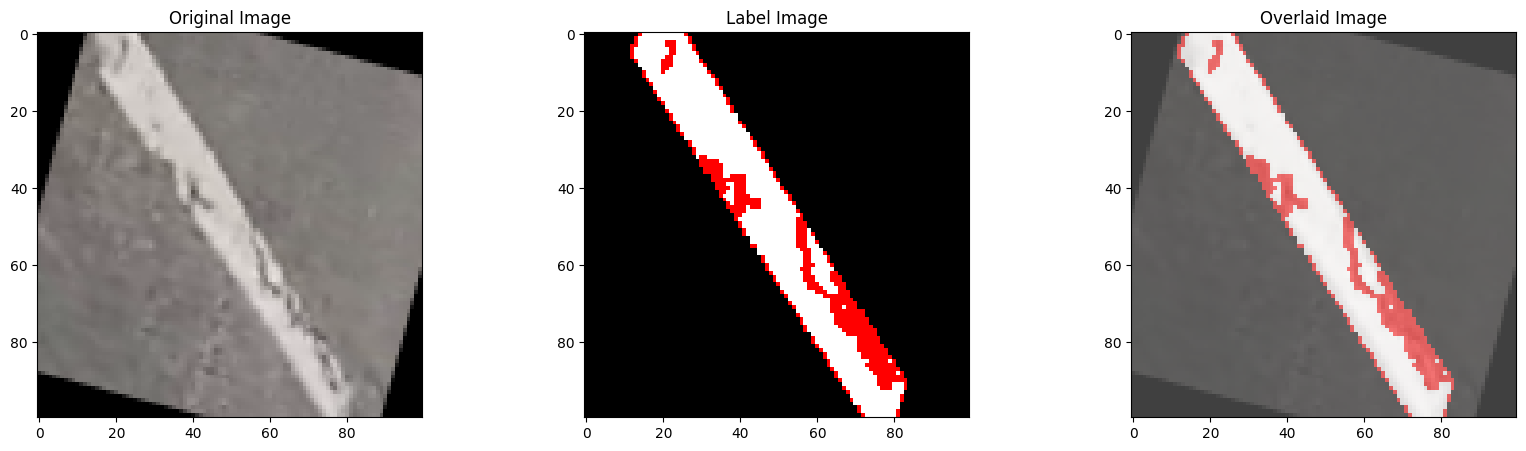

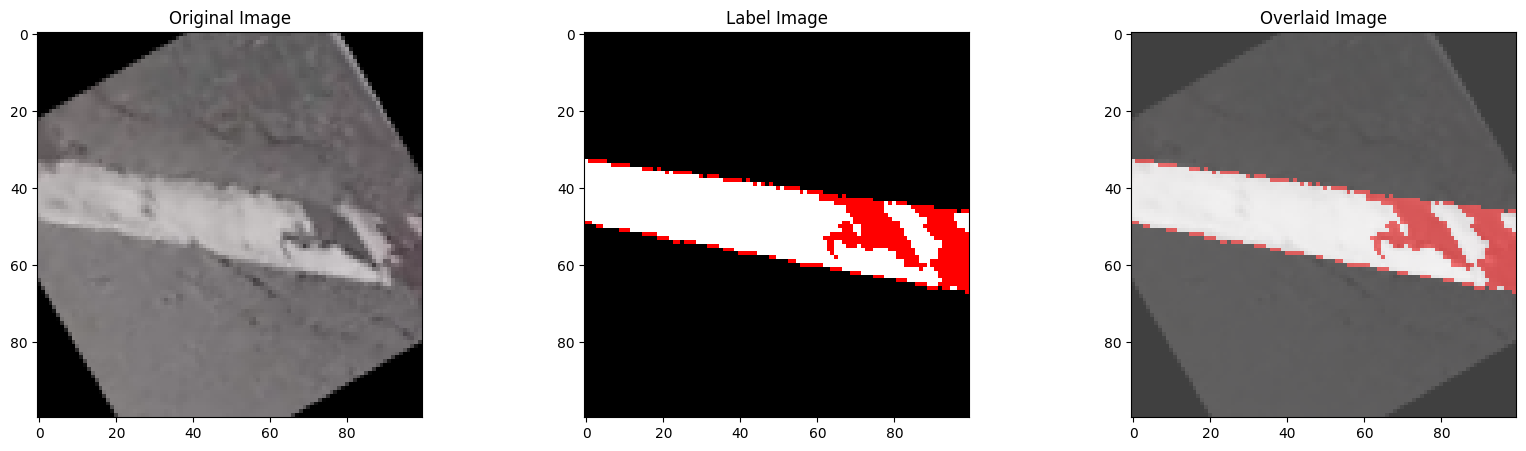

In [192]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

X_data = np.load('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/X_data_aug.npy')
y_data = np.load('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/y_data_aug.npy')

indices = random.sample(range(len(X_data)), 5)

for i in indices:
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))

    ax[0].imshow(X_data[i])
    ax[0].set_title('Original Image')

    label_img = np.zeros((y_data[i].shape[0], y_data[i].shape[1], 3), dtype=np.uint8)
    label_img[y_data[i] == 0] = [0, 0, 0]  
    label_img[y_data[i] == 1] = [255, 0, 0] 
    label_img[y_data[i] == 2] = [255, 255, 255]  
    ax[1].imshow(label_img)
    ax[1].set_title('Label Image')

    ax[2].imshow(X_data[i], alpha=0.5)
    ax[2].imshow(label_img, alpha=0.5)
    ax[2].set_title('Overlaid Image')

    plt.show()


# Segmentation 모델링

In [194]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train = np.load('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/X_data_aug.npy')
y_train = np.load('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/y_data_aug.npy')

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [196]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4019, 100, 100, 3)
(1005, 100, 100, 3)
(4019, 100, 100)
(1005, 100, 100)


In [197]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

input_shape = (100, 100, 3)
inputs = Input(shape=input_shape)

# Encoder
conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(inputs)
conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

# Middle
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool1)
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)

# Decoder
up8 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv1], axis=-1)
conv8 = Conv2D(8, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv8)

outputs = Conv2D(3, (1, 1), activation='softmax')(conv8)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


2024-06-16 06:01:42.532545: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20169 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:3b:00.0, compute capability: 8.0


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 8)  224         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 100, 100, 8)  584         ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 50, 50, 8)    0           ['conv2d_1[0][0]']           

In [198]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


2024-06-16 06:01:58.253957: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600


126/126 [==============================] - 9s 21ms/step - loss: 0.4580 - accuracy: 0.8702 - val_loss: 0.2803 - val_accuracy: 0.9127
Epoch 2/10
126/126 [==============================] - 2s 14ms/step - loss: 0.2069 - accuracy: 0.9340 - val_loss: 0.1599 - val_accuracy: 0.9455
Epoch 3/10
126/126 [==============================] - 2s 14ms/step - loss: 0.1591 - accuracy: 0.9466 - val_loss: 0.1417 - val_accuracy: 0.9528
Epoch 4/10
126/126 [==============================] - 2s 14ms/step - loss: 0.1332 - accuracy: 0.9539 - val_loss: 0.1276 - val_accuracy: 0.9547
Epoch 5/10
126/126 [==============================] - 2s 14ms/step - loss: 0.1265 - accuracy: 0.9554 - val_loss: 0.1180 - val_accuracy: 0.9575
Epoch 6/10
126/126 [==============================] - 2s 14ms/step - loss: 0.1174 - accuracy: 0.9580 - val_loss: 0.1117 - val_accuracy: 0.9598
Epoch 7/10
126/126 [==============================] - 2s 14ms/step - loss: 0.1129 - accuracy: 0.9592 - val_loss: 0.1063 - val_accuracy: 0.9615
Epoch 8/10

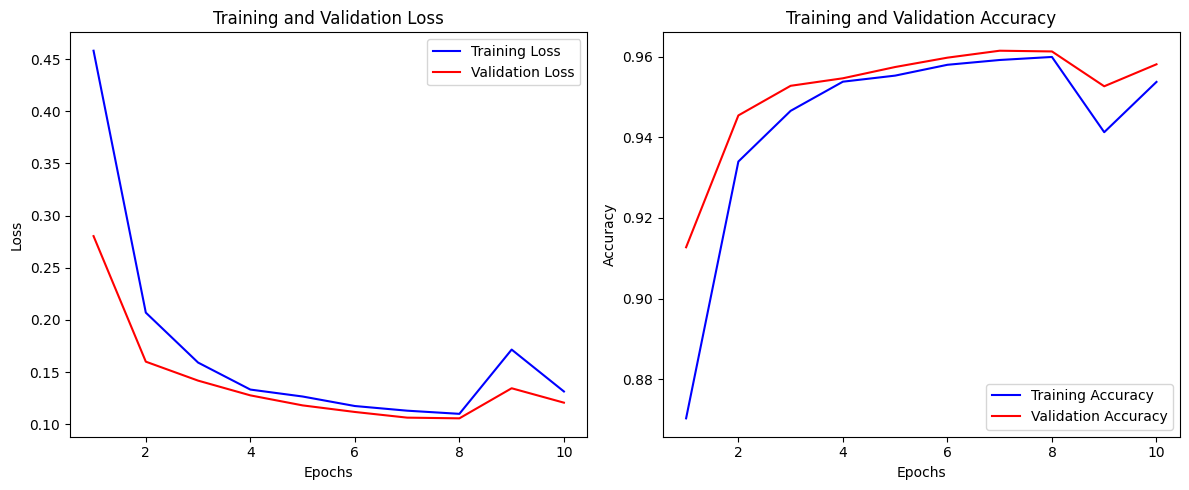

In [199]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_training_history(history)

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score


preds = model.predict(X_test)
preds = np.argmax(preds, axis=-1)  

y_test_flat = y_test.flatten()
preds_flat = preds.flatten()

precision = precision_score(y_test_flat, preds_flat, average='macro', zero_division=0) 
recall = recall_score(y_test_flat, preds_flat, average='macro', zero_division=0) 

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

32/32 [==============================] - 0s 5ms/step
Precision: 0.8213
Recall: 0.7203


In [206]:
unique_values, counts = np.unique(preds[255], return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 8102
Value: 1, Count: 311
Value: 2, Count: 1587


In [205]:
unique_values, counts = np.unique(y_test[255], return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 7811
Value: 1, Count: 668
Value: 2, Count: 1521


### 결과

1/1 [==============================] - 0s 50ms/step


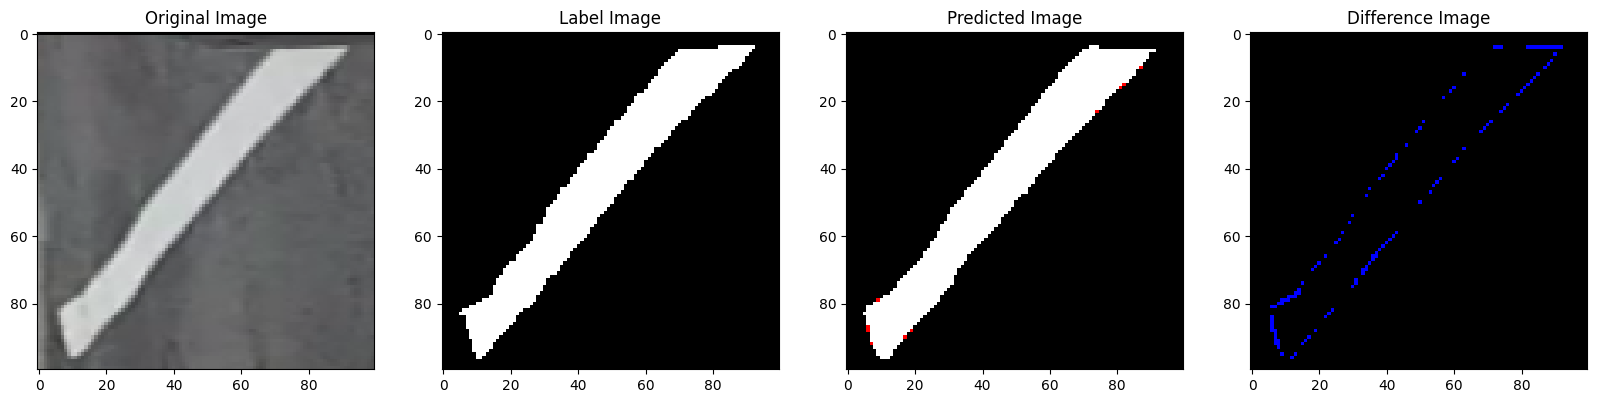

1/1 [==============================] - 0s 50ms/step


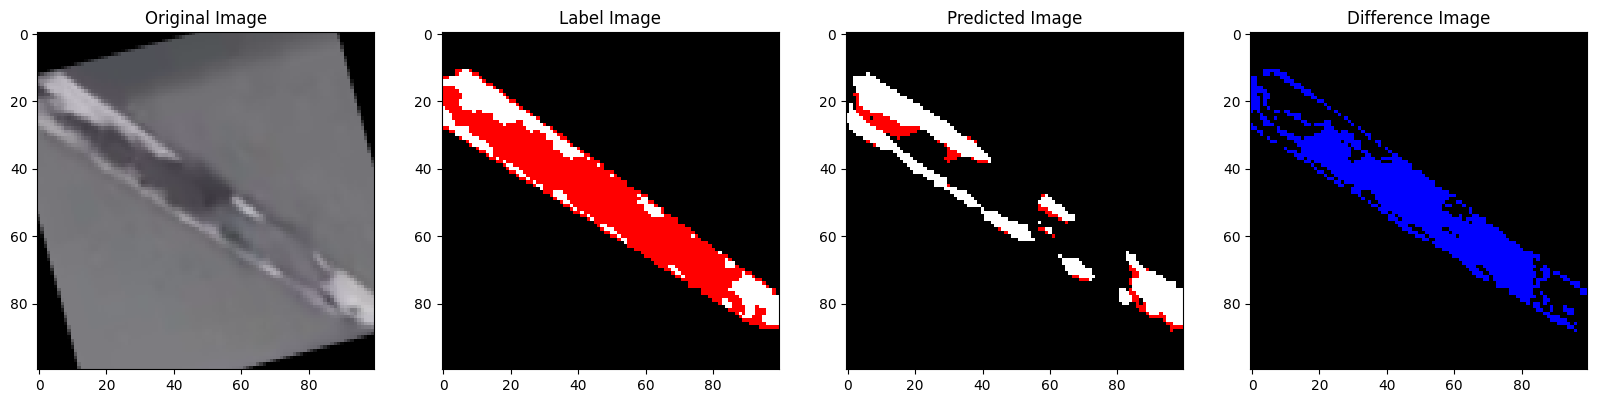

1/1 [==============================] - 0s 50ms/step


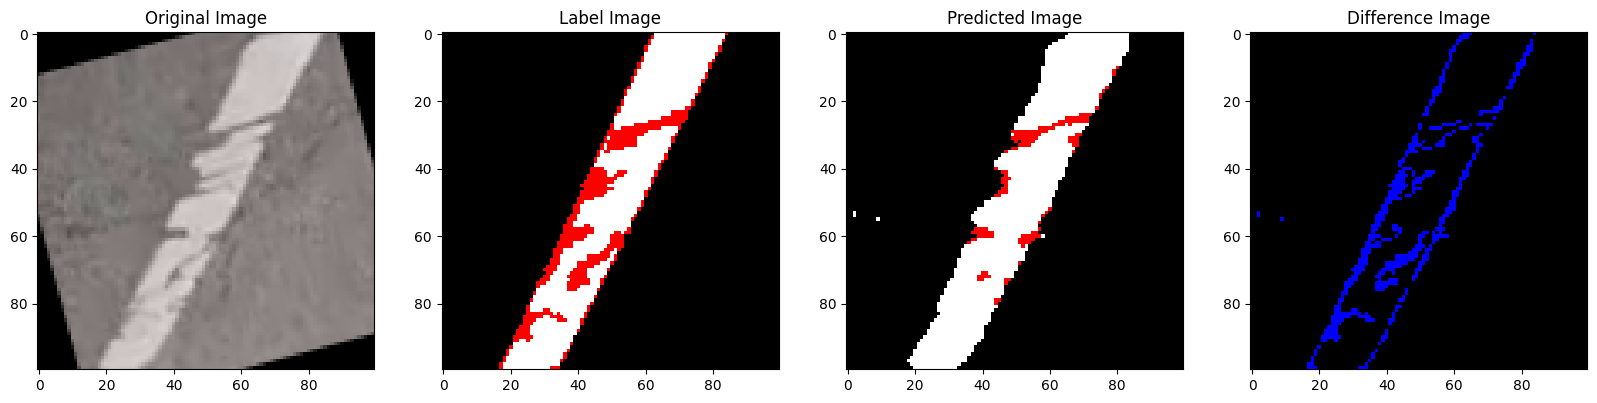

1/1 [==============================] - 0s 49ms/step


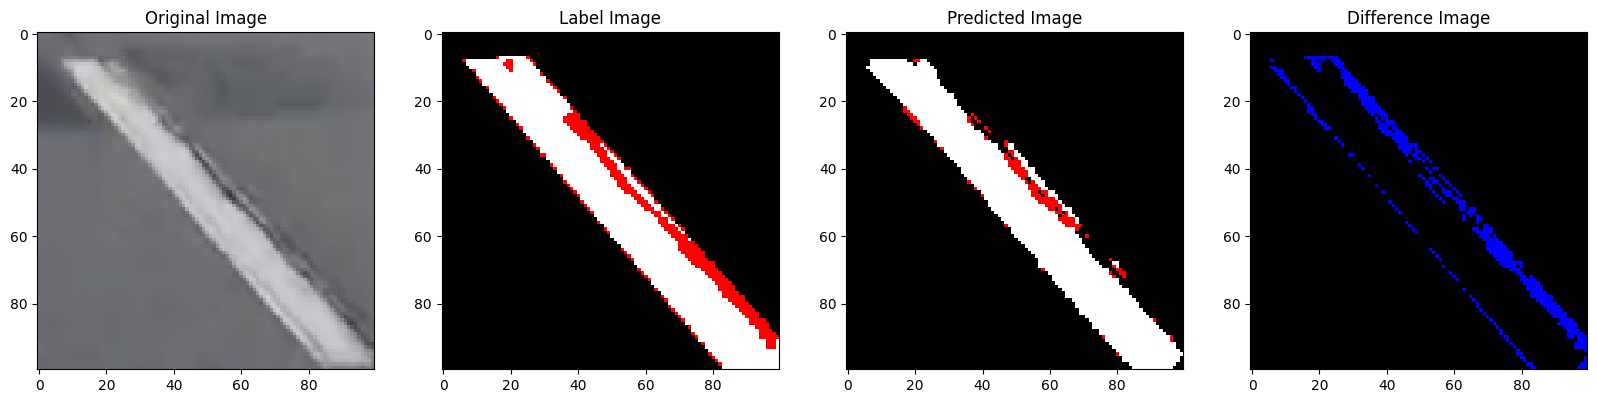

1/1 [==============================] - 0s 50ms/step


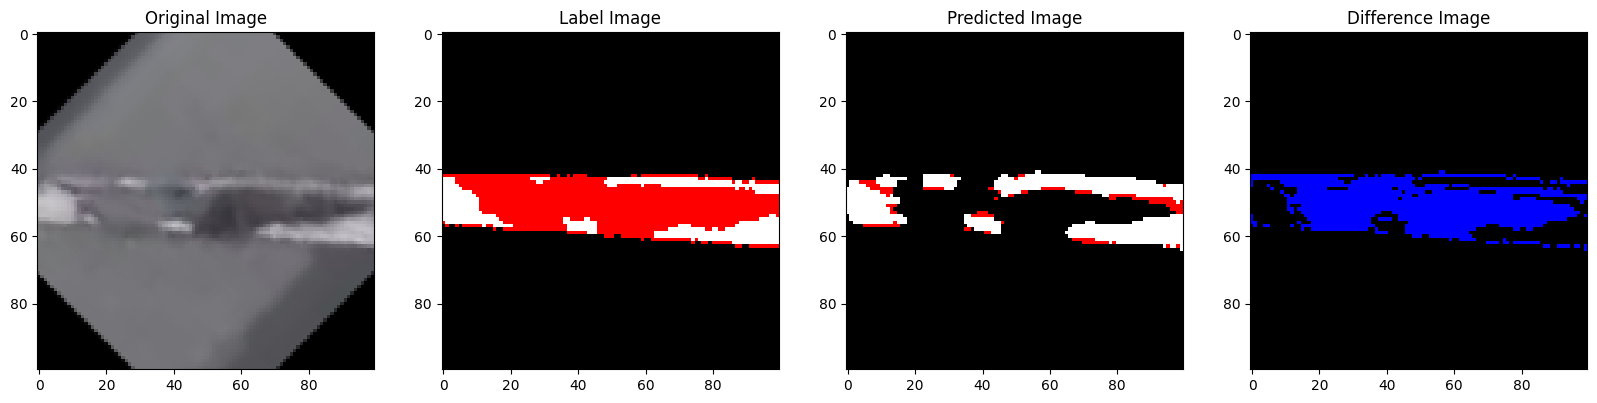

In [215]:
import matplotlib.pyplot as plt
import numpy as np
import random


indices = random.sample(range(len(X_test)), 5)

for i in indices:
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    ax[0].imshow(X_test[i])
    ax[0].set_title('Original Image')

    label_img = np.zeros((y_test[i].shape[0], y_test[i].shape[1], 3), dtype=np.uint8)
    label_img[y_test[i] == 0] = [0, 0, 0]
    label_img[y_test[i] == 1] = [255, 0, 0]
    label_img[y_test[i] == 2] = [255, 255, 255]
    ax[1].imshow(label_img)
    ax[1].set_title('Label Image')

    pred = model.predict(np.expand_dims(X_test[i], axis=0))[0]
    pred_img = np.zeros((pred.shape[0], pred.shape[1], 3), dtype=np.uint8)
    pred_img[np.argmax(pred, axis=-1) == 0] = [0, 0, 0]
    pred_img[np.argmax(pred, axis=-1) == 1] = [255, 0, 0]
    pred_img[np.argmax(pred, axis=-1) == 2] = [255, 255, 255]
    ax[2].imshow(pred_img)
    ax[2].set_title('Predicted Image')

    diff_img = np.zeros((y_test[i].shape[0], y_test[i].shape[1], 3), dtype=np.uint8)
    diff_img[y_test[i] != np.argmax(pred, axis=-1)] = [0, 0, 255]
    ax[3].imshow(diff_img)
    ax[3].set_title('Difference Image')

    plt.show()

## Gray scale

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train = np.load('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/X_data_aug.npy')
y_train = np.load('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/y_data_aug.npy')


In [29]:
import numpy as np
from sklearn.model_selection import train_test_split


X_train = np.load('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/X_data_aug.npy')
y_train = np.load('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/y_data_aug.npy')

# 그레이 스케일 함수 정의
def rgb_to_gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

X_train_gray = np.zeros((X_train.shape[0], X_train.shape[1], X_train.shape[2]))

for i in range(X_train.shape[0]):
    X_train_gray[i] = rgb_to_gray(X_train[i])

In [30]:
X_train_gray.shape

(5024, 100, 100)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_train_gray, y_train, test_size=0.2, random_state=42)

In [35]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

input_shape = (100, 100, 1)
inputs = Input(shape=input_shape)


conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(inputs)
conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)


conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool1)
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)


up8 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv1], axis=-1)
conv8 = Conv2D(8, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv8)


outputs = Conv2D(3, (1, 1), activation='softmax')(conv8)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_43 (Conv2D)             (None, 100, 100, 8)  80          ['input_6[0][0]']                
                                                                                                  
 conv2d_44 (Conv2D)             (None, 100, 100, 8)  584         ['conv2d_43[0][0]']              
                                                                                                  
 max_pooling2d_11 (MaxPooling2D  (None, 50, 50, 8)   0           ['conv2d_44[0][0]']        

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=5,          
    verbose=1,          
    restore_best_weights=True  
)


history = model.fit(
    X_train, 
    y_train, 
    epochs=500, 
    batch_size=32, 
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]  
)


Epoch 1/500
126/126 [==============================] - 8s 19ms/step - loss: 0.7811 - accuracy: 0.8220 - val_loss: 0.3278 - val_accuracy: 0.9046
Epoch 2/500
126/126 [==============================] - 2s 15ms/step - loss: 0.2960 - accuracy: 0.9140 - val_loss: 0.2549 - val_accuracy: 0.9283
Epoch 3/500
126/126 [==============================] - 2s 15ms/step - loss: 0.2428 - accuracy: 0.9277 - val_loss: 0.2382 - val_accuracy: 0.9313
Epoch 4/500
126/126 [==============================] - 2s 15ms/step - loss: 0.2205 - accuracy: 0.9330 - val_loss: 0.2183 - val_accuracy: 0.9353
Epoch 5/500
126/126 [==============================] - 2s 15ms/step - loss: 0.2030 - accuracy: 0.9372 - val_loss: 0.1947 - val_accuracy: 0.9411
Epoch 6/500
126/126 [==============================] - 2s 14ms/step - loss: 0.1992 - accuracy: 0.9383 - val_loss: 0.2314 - val_accuracy: 0.9352
Epoch 7/500
126/126 [==============================] - 2s 14ms/step - loss: 0.1832 - accuracy: 0.9422 - val_loss: 0.1654 - val_accuracy:

In [37]:
y_pred = model.predict(X_test)

32/32 [==============================] - 0s 5ms/step


In [38]:
import numpy as np

def pixel_accuracy(y_true, y_pred):

    # y_pred가 확률 분포인 경우, 가장 높은 확률의 인덱스를 선택
    if len(y_pred.shape) > len(y_true.shape):
        y_pred = np.argmax(y_pred, axis=-1)
    
    # True positive의 수를 계산
    correct = np.sum(y_test == y_pred)
    
    # 총 픽셀 수
    total = y_test.size
    
    return correct / total


accuracy = pixel_accuracy(y_test, y_pred)
print(f"Pixel Accuracy: {accuracy:.4f}")

Pixel Accuracy: 0.9677


1/1 [==============================] - 0s 61ms/step


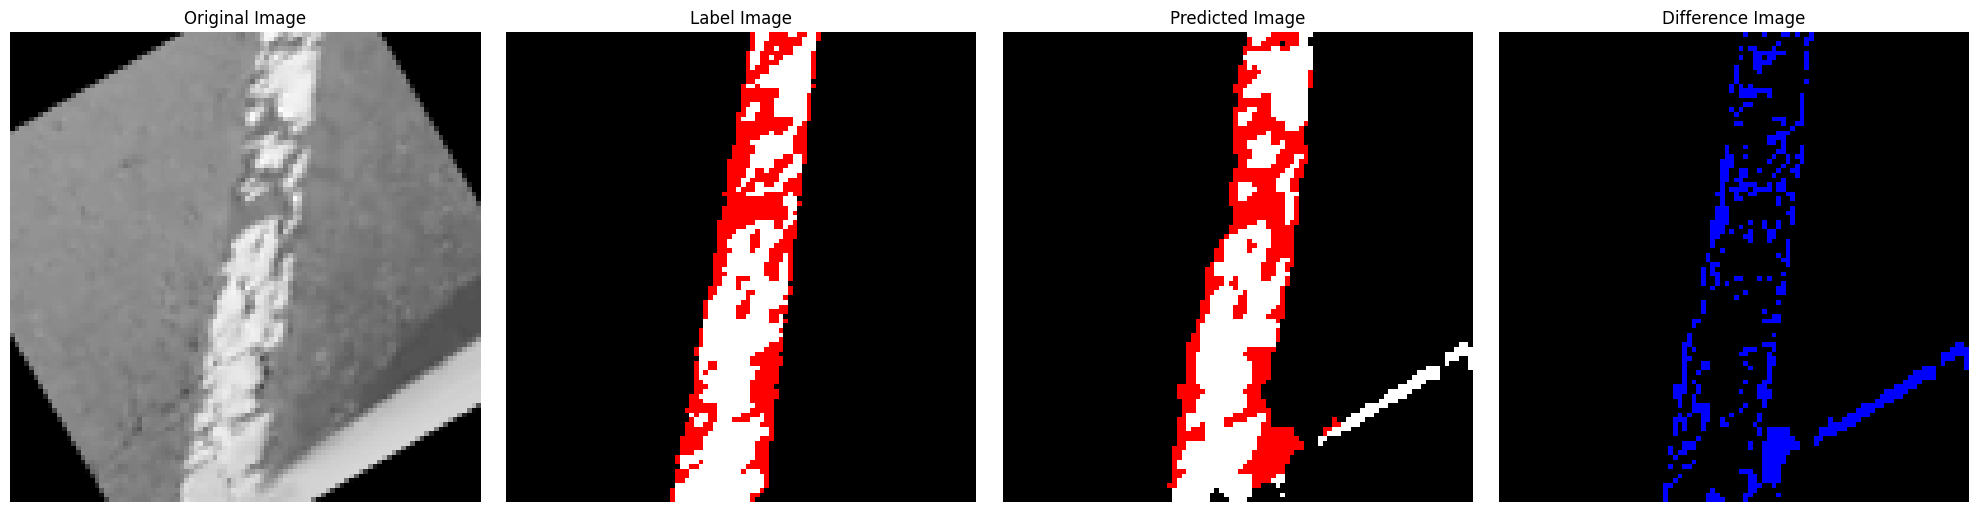

1/1 [==============================] - 0s 58ms/step


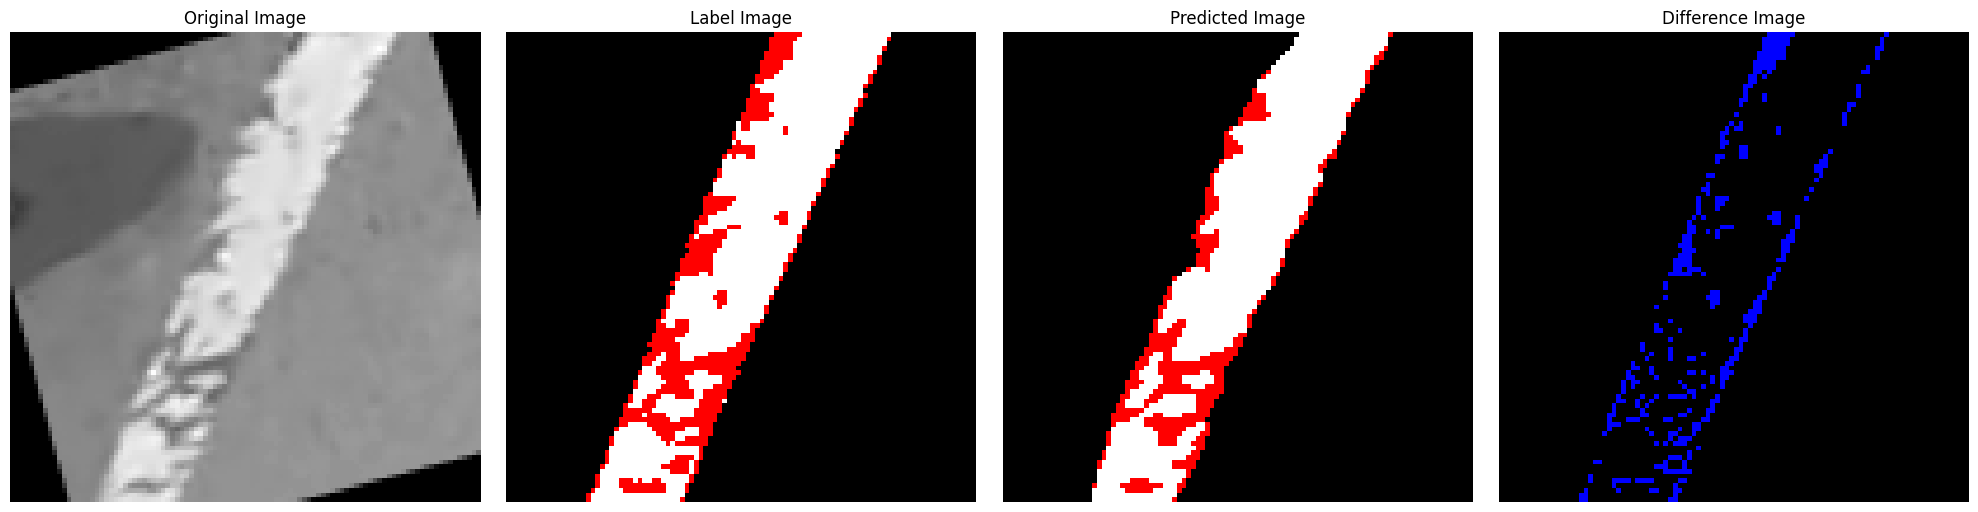

1/1 [==============================] - 0s 59ms/step


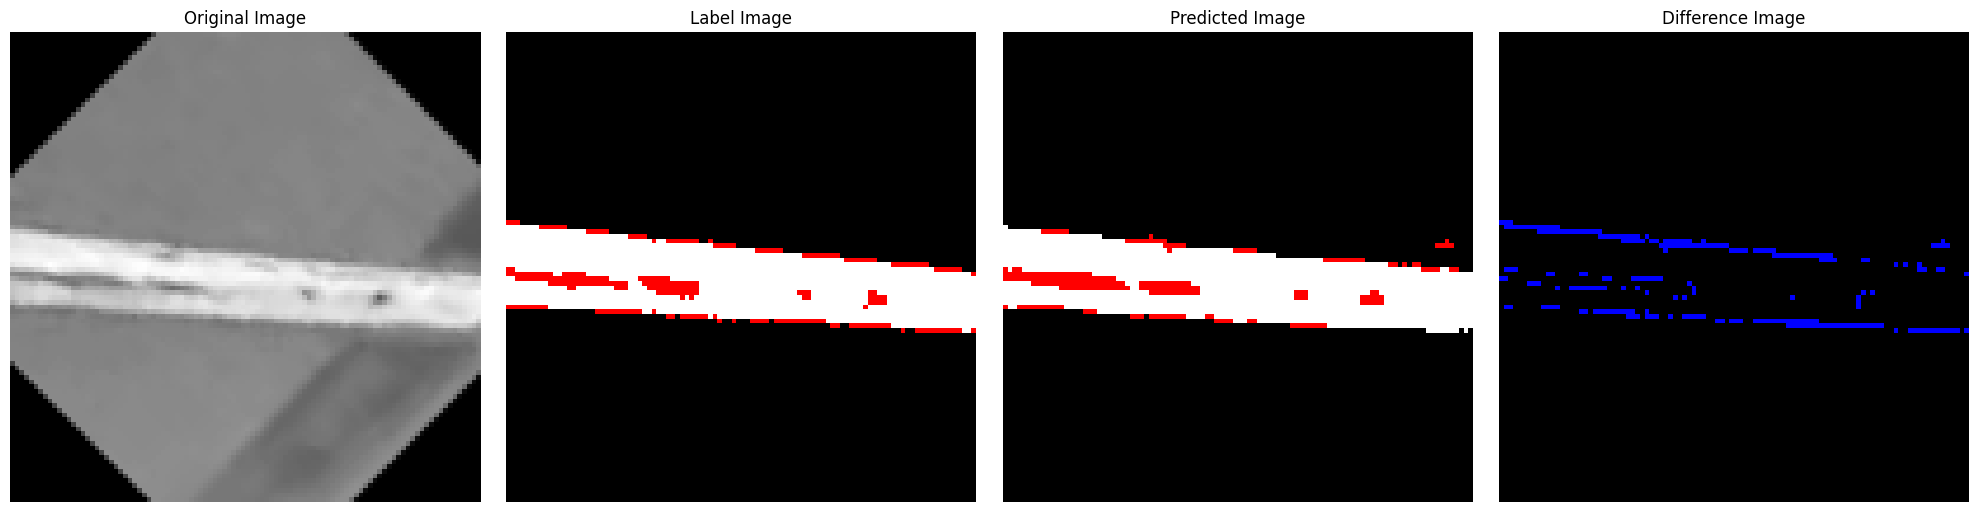

1/1 [==============================] - 0s 56ms/step


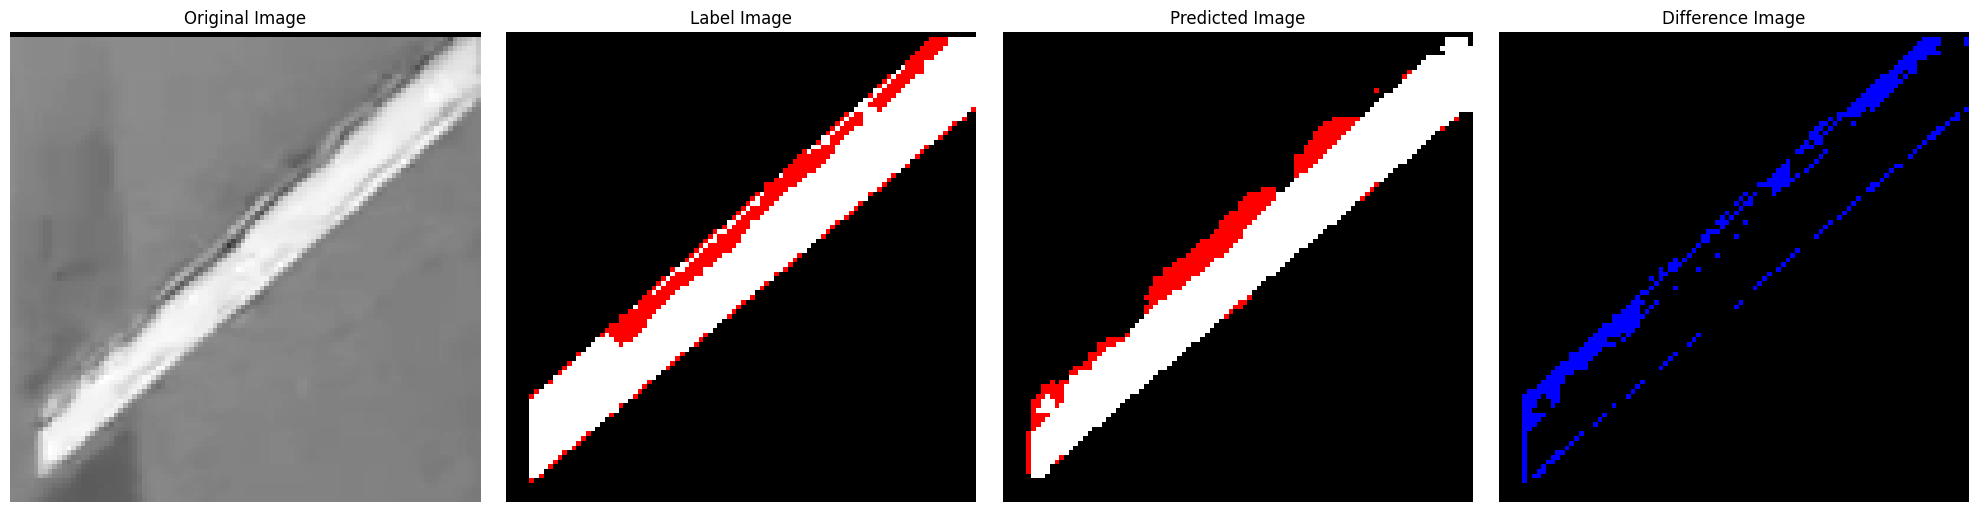

1/1 [==============================] - 0s 56ms/step


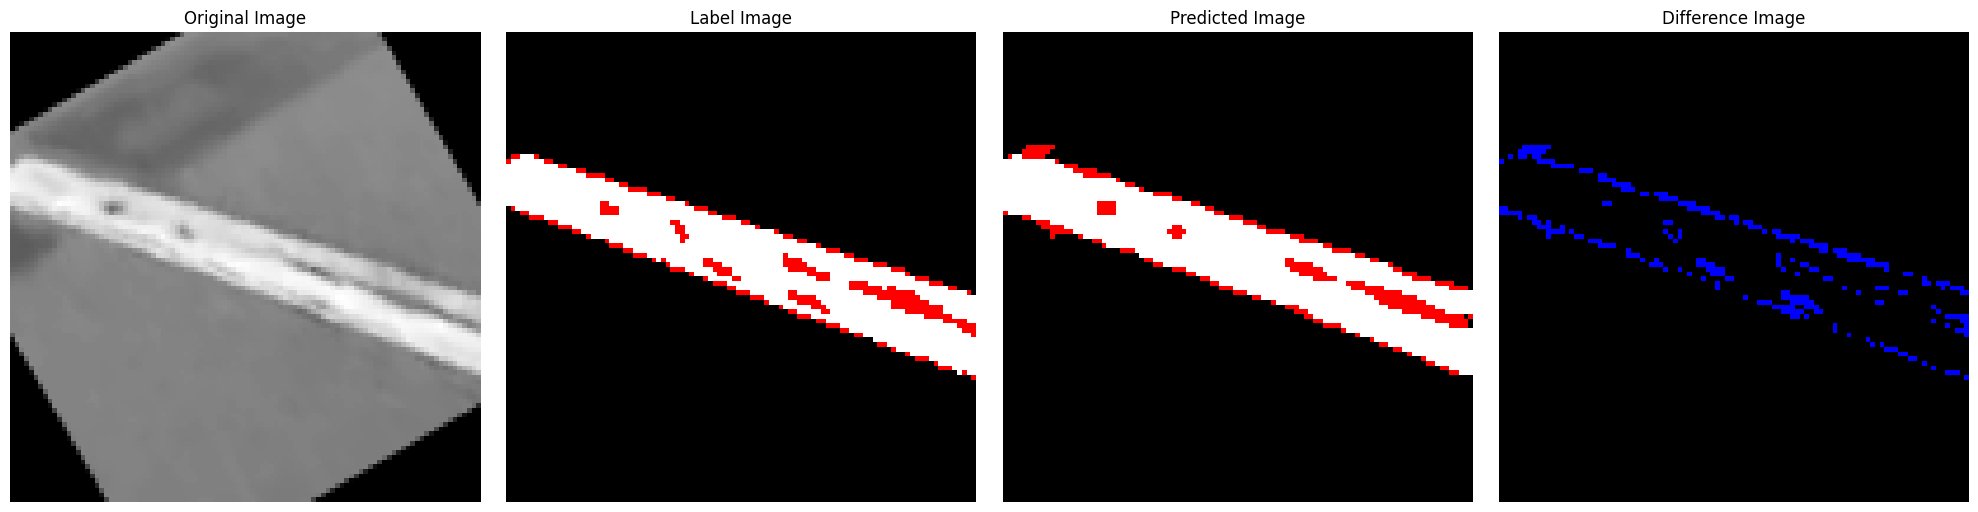

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import random


indices = random.sample(range(len(X_test)), 5)


for i in indices:
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    ax[0].imshow(X_test[i], cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    label_img = np.zeros((y_test[i].shape[0], y_test[i].shape[1], 3), dtype=np.uint8)
    label_img[y_test[i] == 0] = [0, 0, 0]  # 클래스 0: 검정색
    label_img[y_test[i] == 1] = [255, 0, 0]  # 클래스 1: 빨간색
    label_img[y_test[i] == 2] = [255, 255, 255]  # 클래스 2: 흰색
    ax[1].imshow(label_img)
    ax[1].set_title('Label Image')
    ax[1].axis('off')

    pred = model.predict(np.expand_dims(X_test[i], axis=0))[0]
    pred_img = np.zeros((pred.shape[0], pred.shape[1], 3), dtype=np.uint8)
    pred_labels = np.argmax(pred, axis=-1)
    pred_img[pred_labels == 0] = [0, 0, 0]  # 클래스 0: 검정색
    pred_img[pred_labels == 1] = [255, 0, 0]  # 클래스 1: 빨간색
    pred_img[pred_labels == 2] = [255, 255, 255]  # 클래스 2: 흰색
    ax[2].imshow(pred_img)
    ax[2].set_title('Predicted Image')
    ax[2].axis('off')

    diff_img = np.zeros((y_test[i].shape[0], y_test[i].shape[1], 3), dtype=np.uint8)
    diff_img[y_test[i] != pred_labels] = [0, 0, 255]  # 차이 있는 픽셀을 파란색으로 표시
    ax[3].imshow(diff_img)
    ax[3].set_title('Difference Image')
    ax[3].axis('off')

    plt.tight_layout()
    plt.show()
    plt.close(fig)


# RGB 도로 제외 차선만 모델에 넣었을 때 예측

In [58]:
X_train = np.load('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/X_data_aug.npy')
y_train = np.load('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/y_data_aug.npy')

In [60]:
print(X_train.shape)
print(y_train.shape)

(5024, 100, 100, 3)
(5024, 100, 100)


In [61]:
import numpy as np

zero_indices = np.where(y_train == 0)

X_train[zero_indices] = [0, 0, 0]

np.save('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/X_data_배경0처리.npy', X_train)

In [65]:
X_train = np.load('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/X_data_배경0처리.npy')
y_train = np.load('/home/nas/data/jangho/Segmentation 픽셀별 훼손 부분 라벨링/y_data_aug.npy')

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [69]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

input_shape = (100, 100, 3)
inputs = Input(shape=input_shape)

conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(inputs)
conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool1)
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)

up8 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv1], axis=-1)
conv8 = Conv2D(8, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv8)

outputs = Conv2D(3, (1, 1), activation='softmax')(conv8)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_64 (Conv2D)             (None, 100, 100, 8)  224         ['input_9[0][0]']                
                                                                                                  
 conv2d_65 (Conv2D)             (None, 100, 100, 8)  584         ['conv2d_64[0][0]']              
                                                                                                  
 max_pooling2d_14 (MaxPooling2D  (None, 50, 50, 8)   0           ['conv2d_65[0][0]']        

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=5,          
    verbose=1,          
    restore_best_weights=True  
)


history = model.fit(
    X_train, 
    y_train, 
    epochs=500, 
    batch_size=32, 
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]  
)


Epoch 1/500
126/126 [==============================] - 7s 17ms/step - loss: 0.2701 - accuracy: 0.9664 - val_loss: 0.0547 - val_accuracy: 0.9780
Epoch 2/500
126/126 [==============================] - 2s 13ms/step - loss: 0.0486 - accuracy: 0.9795 - val_loss: 0.0429 - val_accuracy: 0.9818
Epoch 3/500
126/126 [==============================] - 2s 13ms/step - loss: 0.0432 - accuracy: 0.9815 - val_loss: 0.0424 - val_accuracy: 0.9816
Epoch 4/500
126/126 [==============================] - 2s 13ms/step - loss: 0.0406 - accuracy: 0.9826 - val_loss: 0.0369 - val_accuracy: 0.9841
Epoch 5/500
126/126 [==============================] - 2s 13ms/step - loss: 0.0375 - accuracy: 0.9839 - val_loss: 0.0368 - val_accuracy: 0.9839
Epoch 6/500
126/126 [==============================] - 2s 13ms/step - loss: 0.0357 - accuracy: 0.9847 - val_loss: 0.0335 - val_accuracy: 0.9855
Epoch 7/500
126/126 [==============================] - 2s 13ms/step - loss: 0.0353 - accuracy: 0.9849 - val_loss: 0.0341 - val_accuracy:

In [71]:
y_pred = model.predict(X_test)

32/32 [==============================] - 0s 4ms/step


1/1 [==============================] - 0s 75ms/step


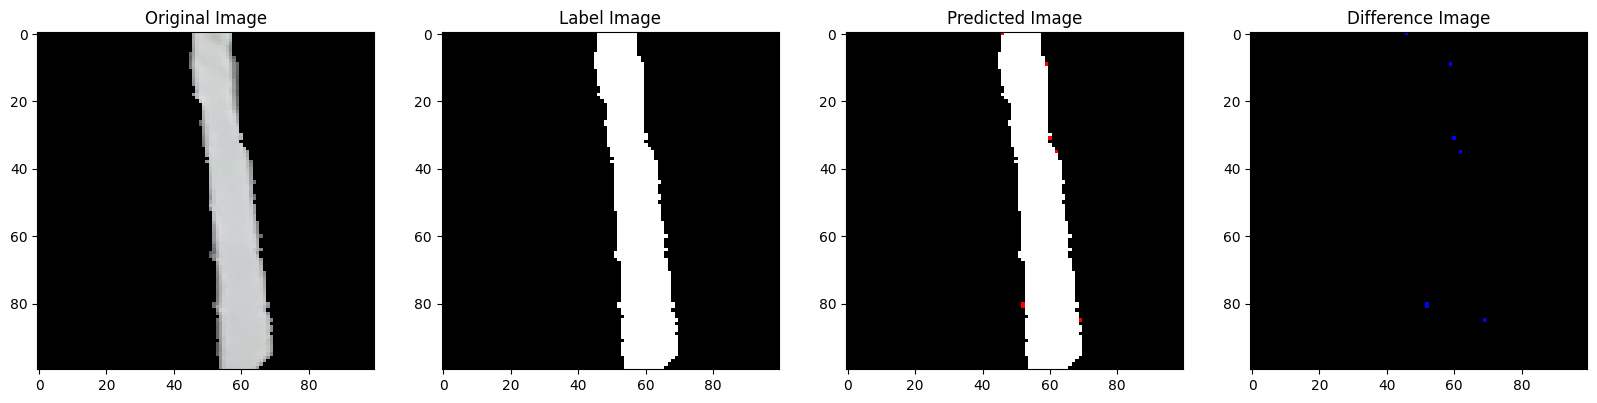

1/1 [==============================] - 0s 67ms/step


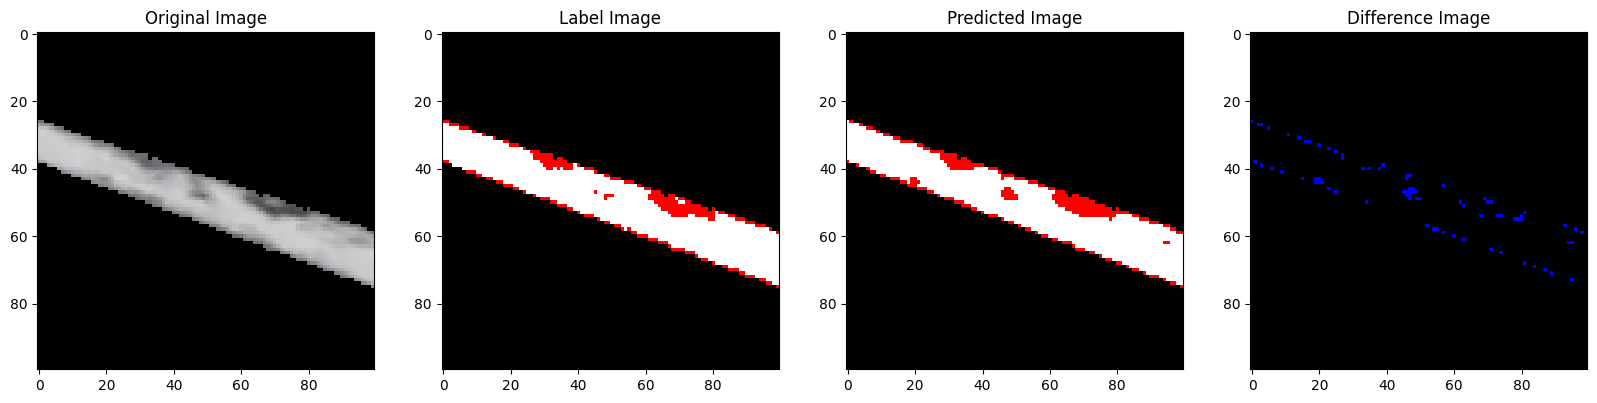

1/1 [==============================] - 0s 60ms/step


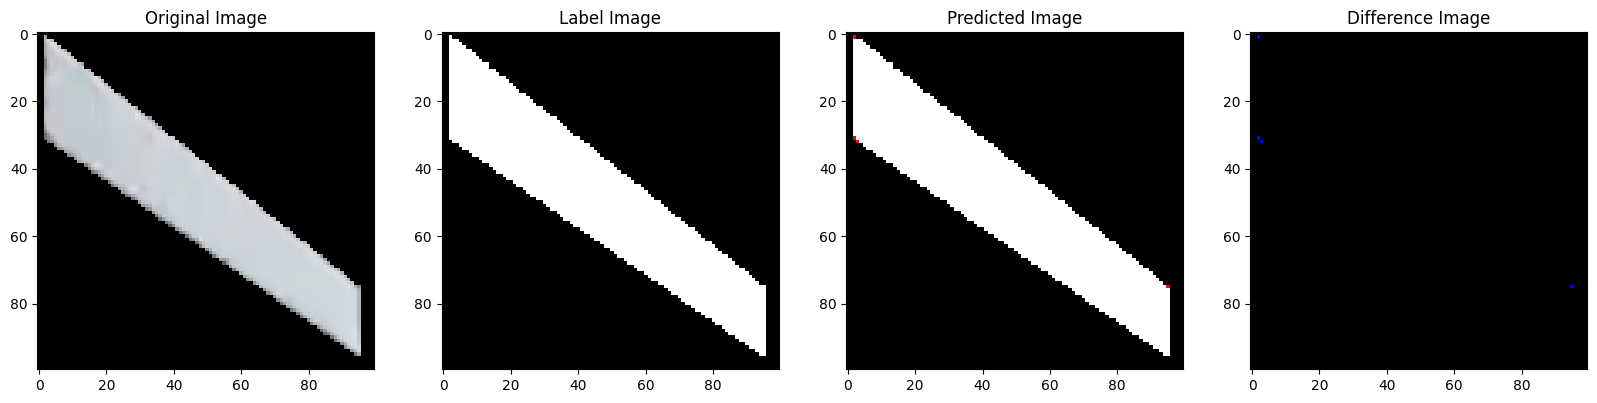

1/1 [==============================] - 0s 58ms/step


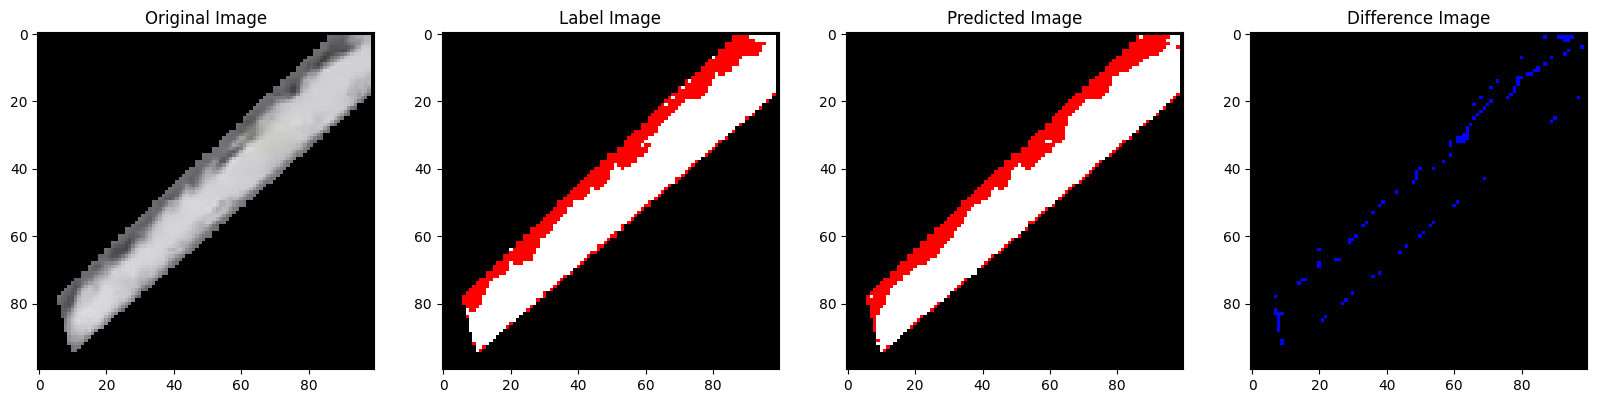

1/1 [==============================] - 0s 56ms/step


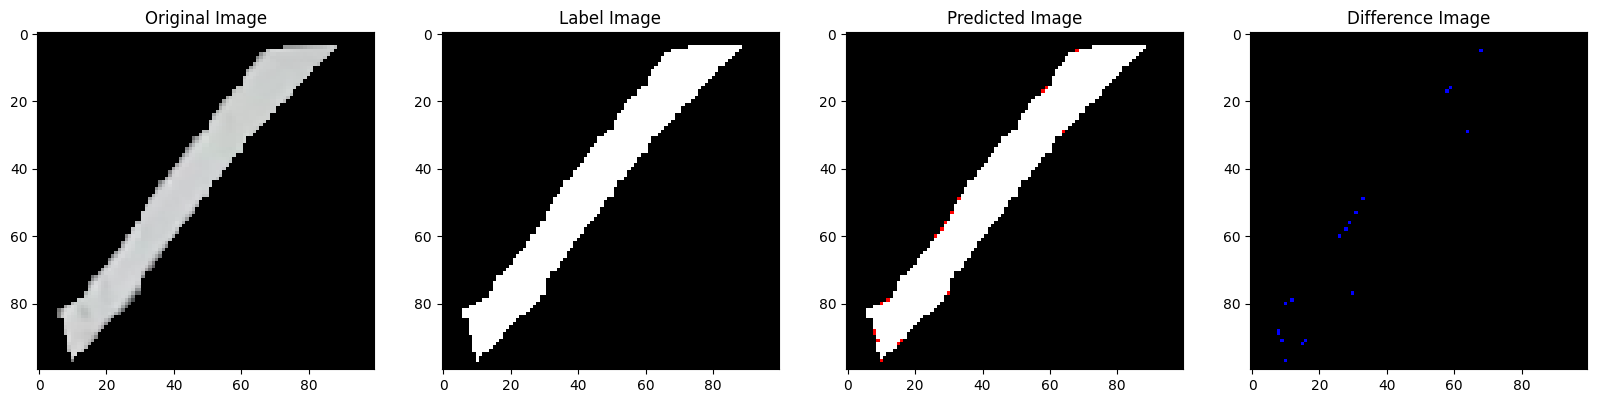

1/1 [==============================] - 0s 56ms/step


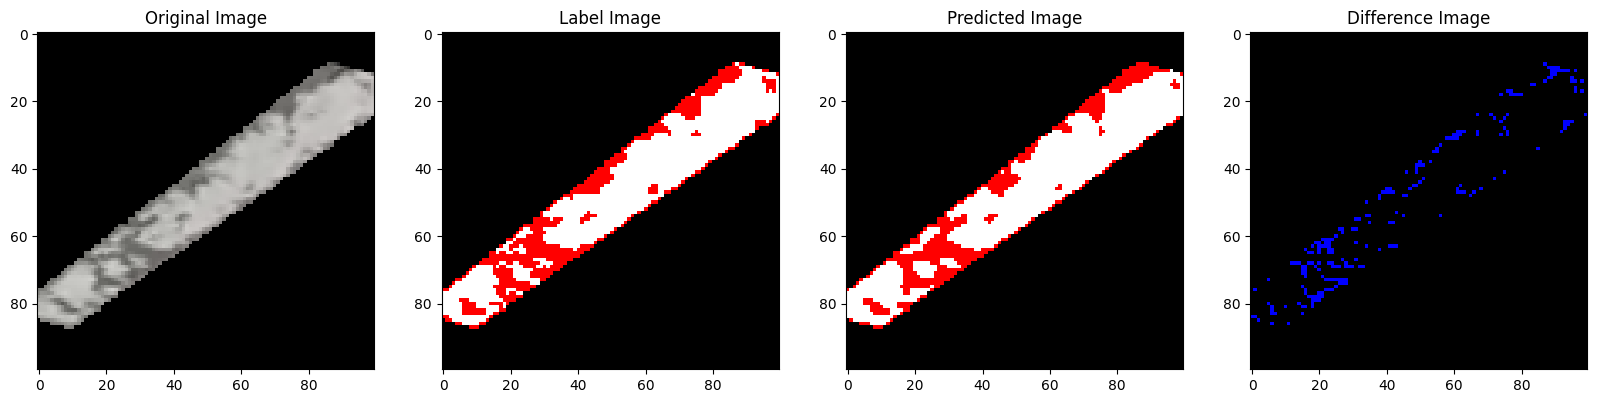

1/1 [==============================] - 0s 54ms/step


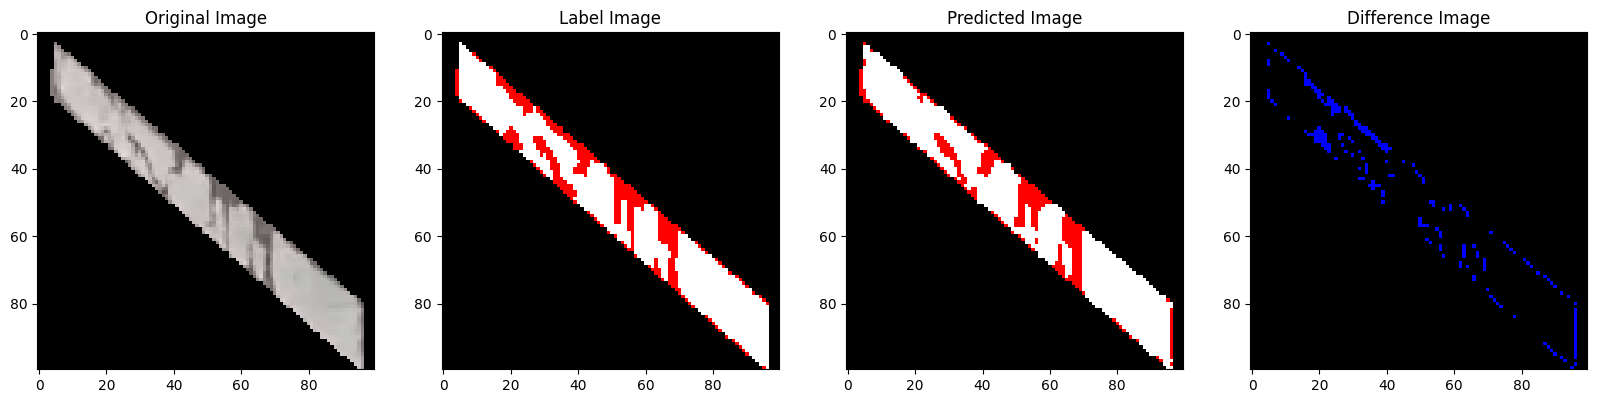

1/1 [==============================] - 0s 54ms/step


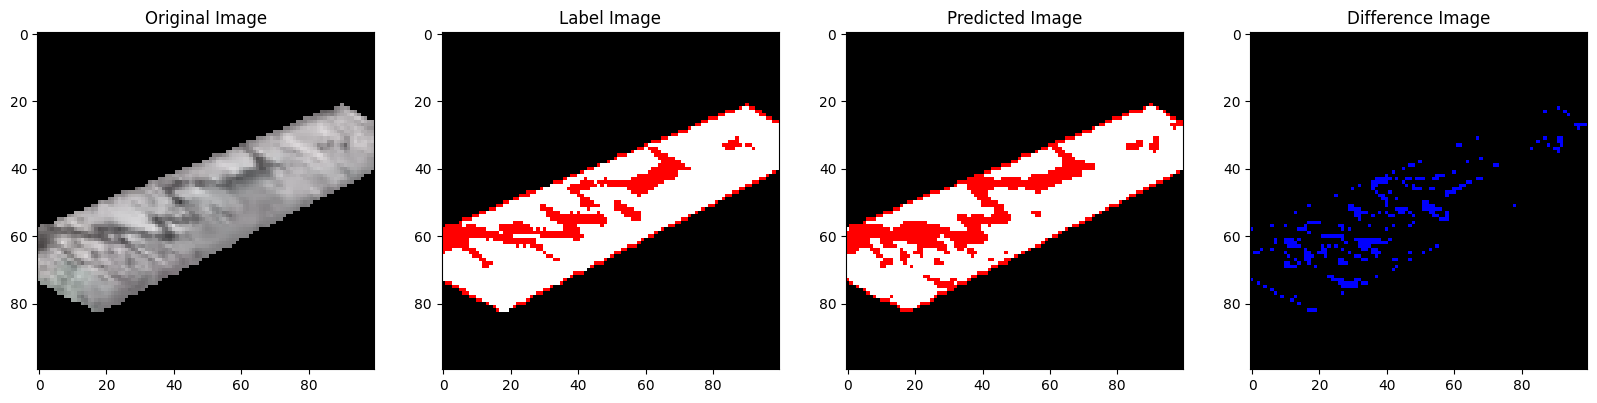

1/1 [==============================] - 0s 53ms/step


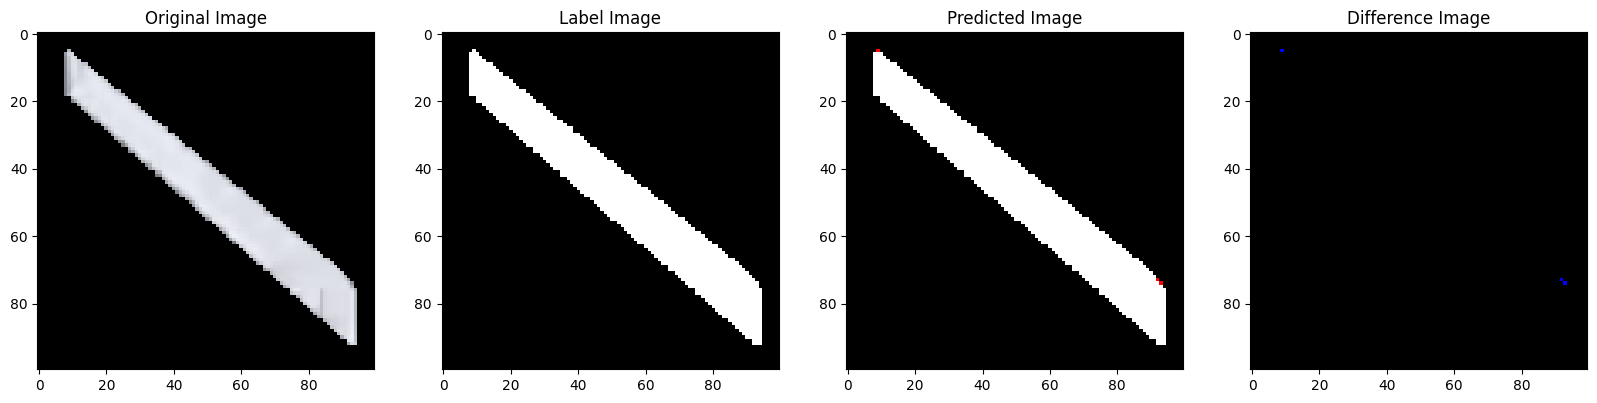

1/1 [==============================] - 0s 53ms/step


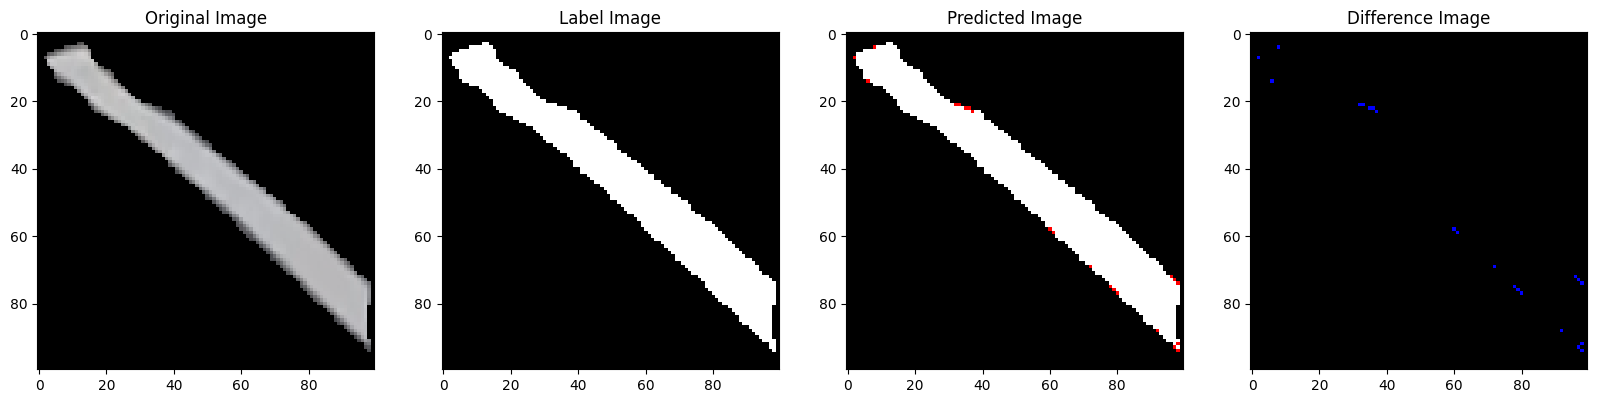

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import random


indices = random.sample(range(len(X_test)), 10)

for i in indices:
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    ax[0].imshow(X_test[i])
    ax[0].set_title('Original Image')

    label_img = np.zeros((y_test[i].shape[0], y_test[i].shape[1], 3), dtype=np.uint8)
    label_img[y_test[i] == 0] = [0, 0, 0]
    label_img[y_test[i] == 1] = [255, 0, 0]
    label_img[y_test[i] == 2] = [255, 255, 255]
    ax[1].imshow(label_img)
    ax[1].set_title('Label Image')

    pred = model.predict(np.expand_dims(X_test[i], axis=0))[0]
    pred_img = np.zeros((pred.shape[0], pred.shape[1], 3), dtype=np.uint8)
    pred_img[np.argmax(pred, axis=-1) == 0] = [0, 0, 0]
    pred_img[np.argmax(pred, axis=-1) == 1] = [255, 0, 0]
    pred_img[np.argmax(pred, axis=-1) == 2] = [255, 255, 255]
    ax[2].imshow(pred_img)
    ax[2].set_title('Predicted Image')

    diff_img = np.zeros((y_test[i].shape[0], y_test[i].shape[1], 3), dtype=np.uint8)
    diff_img[y_test[i] != np.argmax(pred, axis=-1)] = [0, 0, 255]
    ax[3].imshow(diff_img)
    ax[3].set_title('Difference Image')

    plt.show()


1/1 [==============================] - 0s 53ms/step


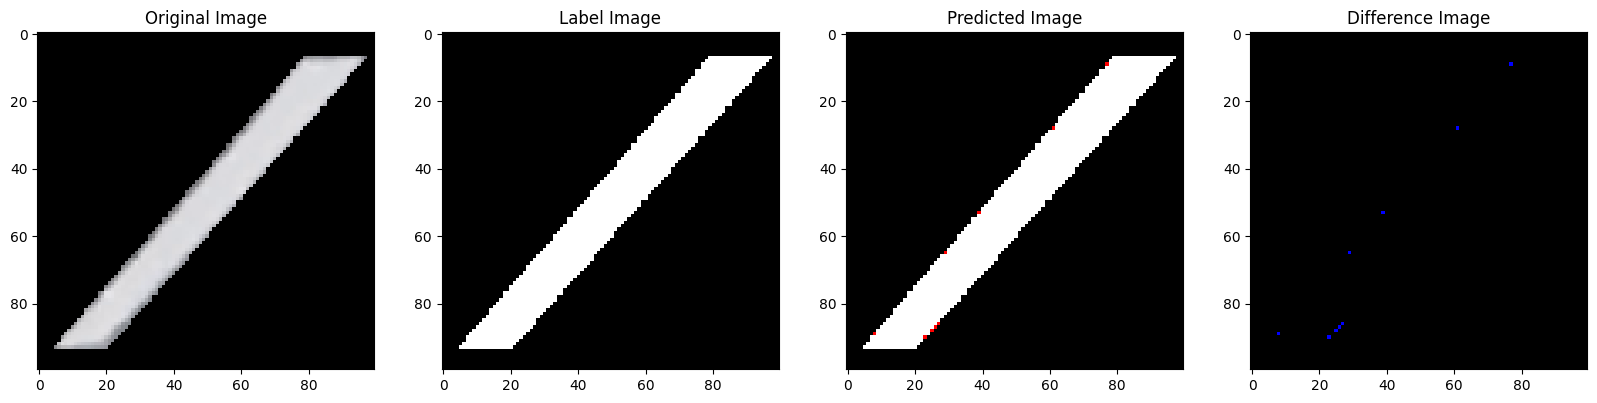

1/1 [==============================] - 0s 62ms/step


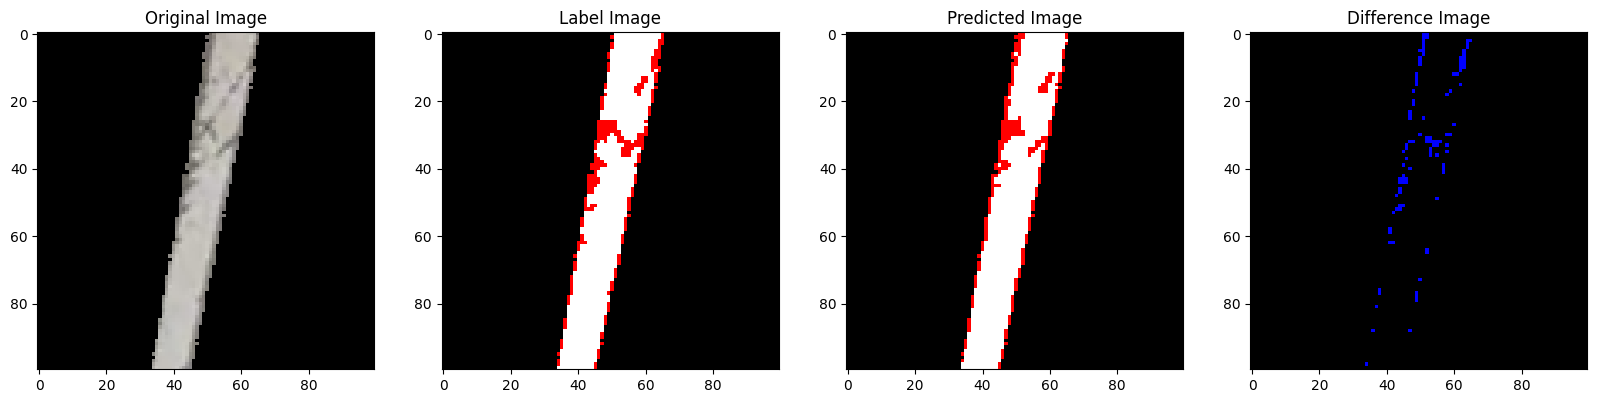

1/1 [==============================] - 0s 62ms/step


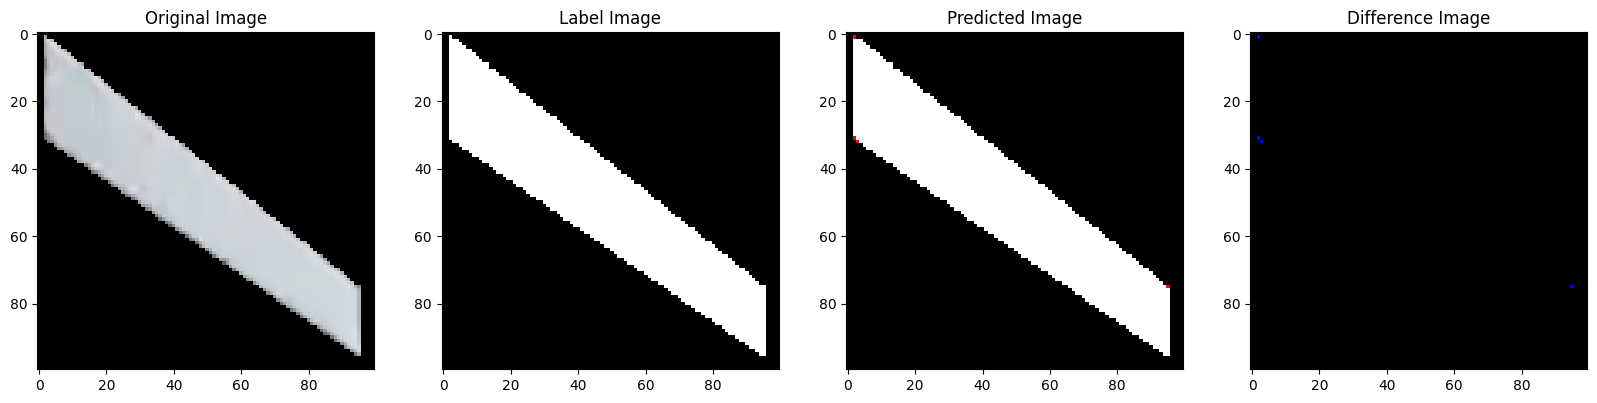

1/1 [==============================] - 0s 59ms/step


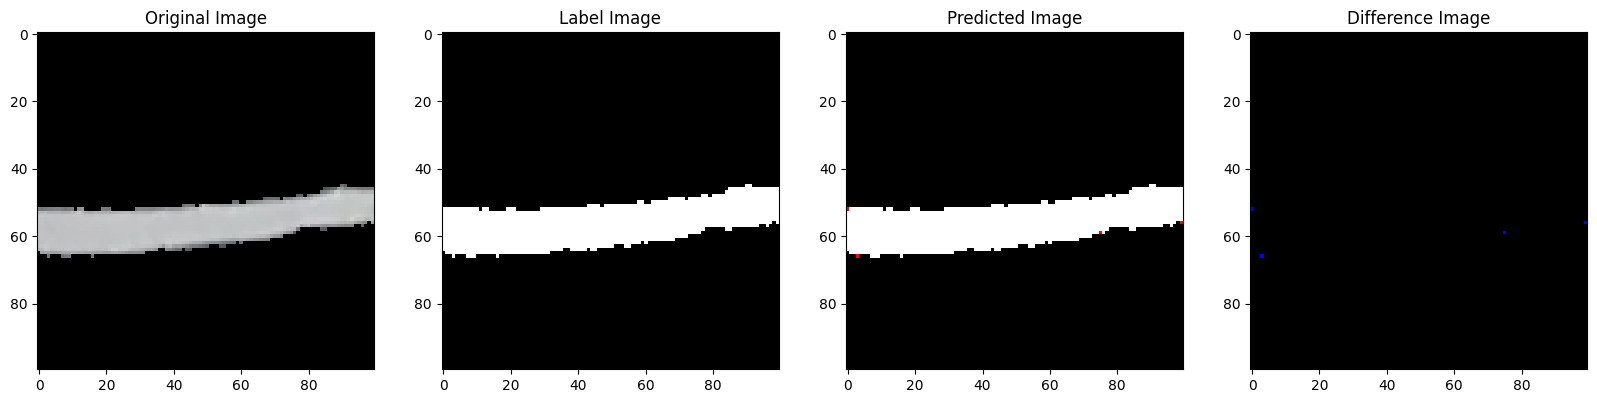

1/1 [==============================] - 0s 57ms/step


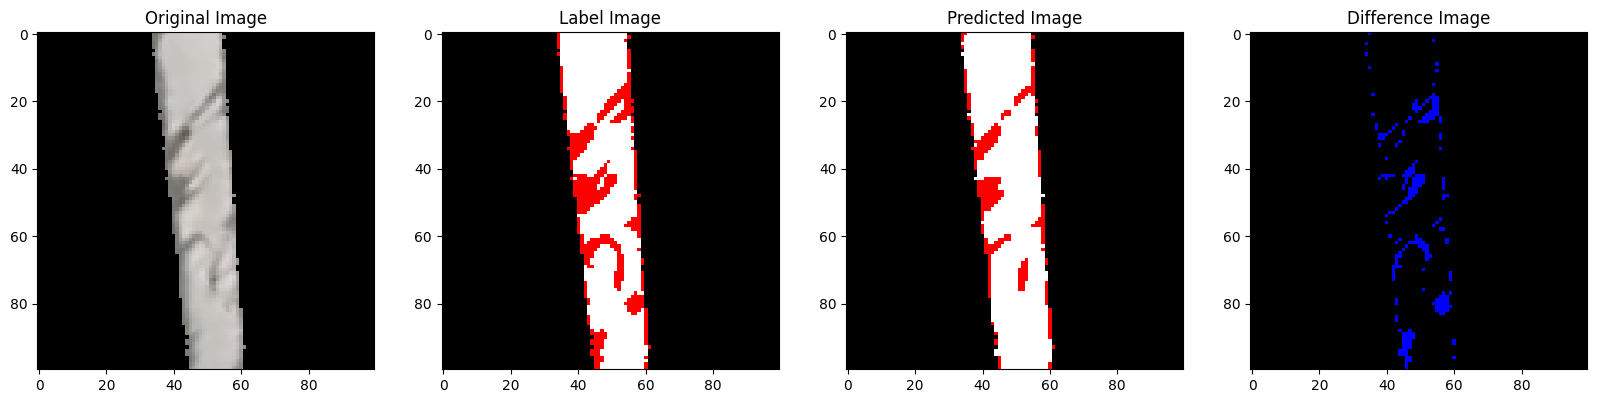

1/1 [==============================] - 0s 56ms/step


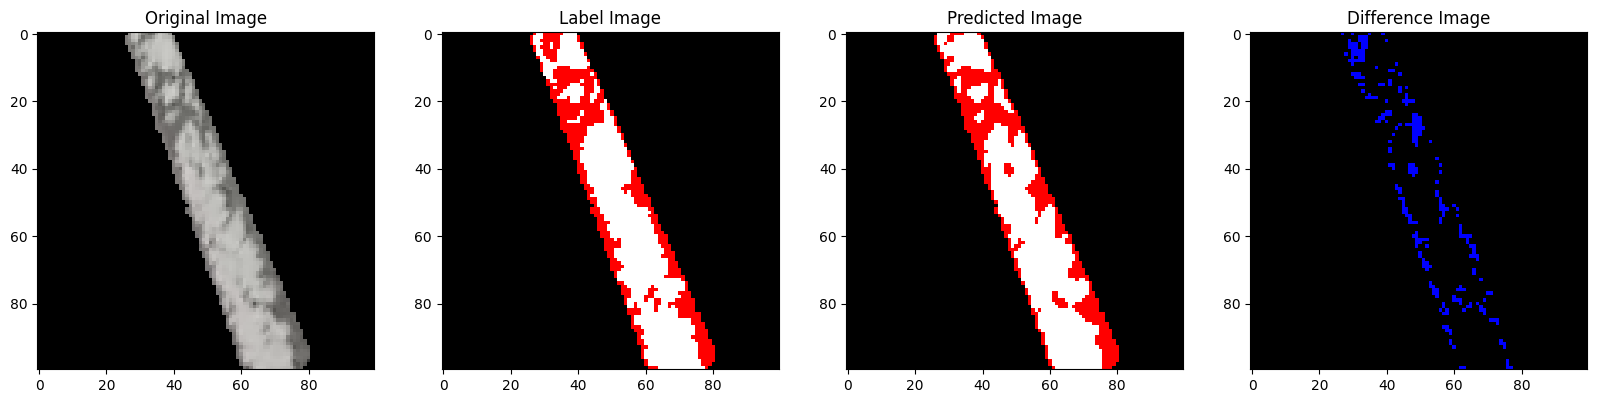

1/1 [==============================] - 0s 55ms/step


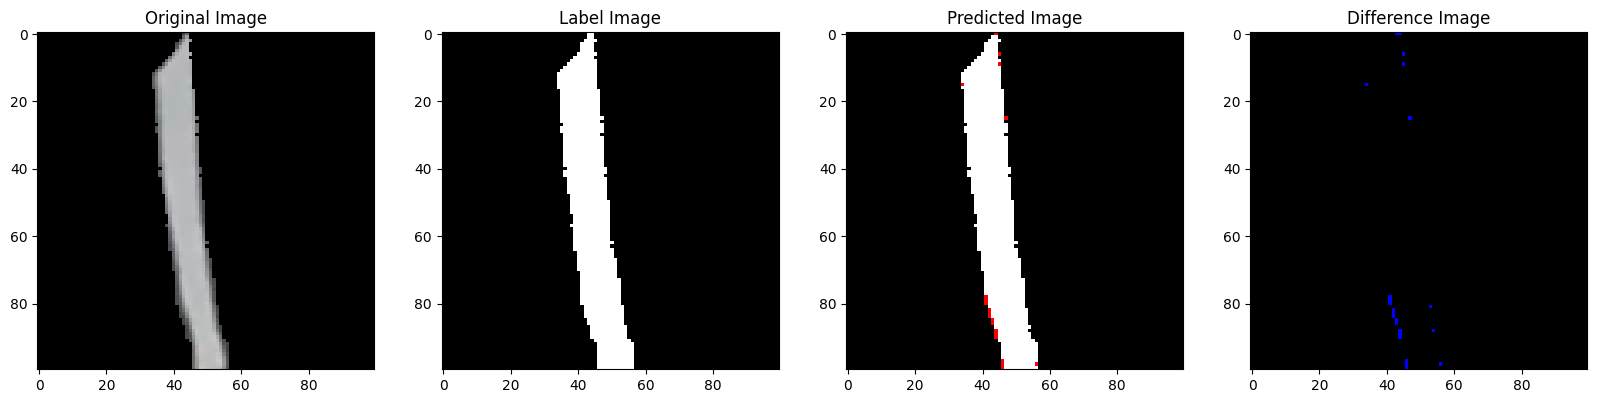

1/1 [==============================] - 0s 55ms/step


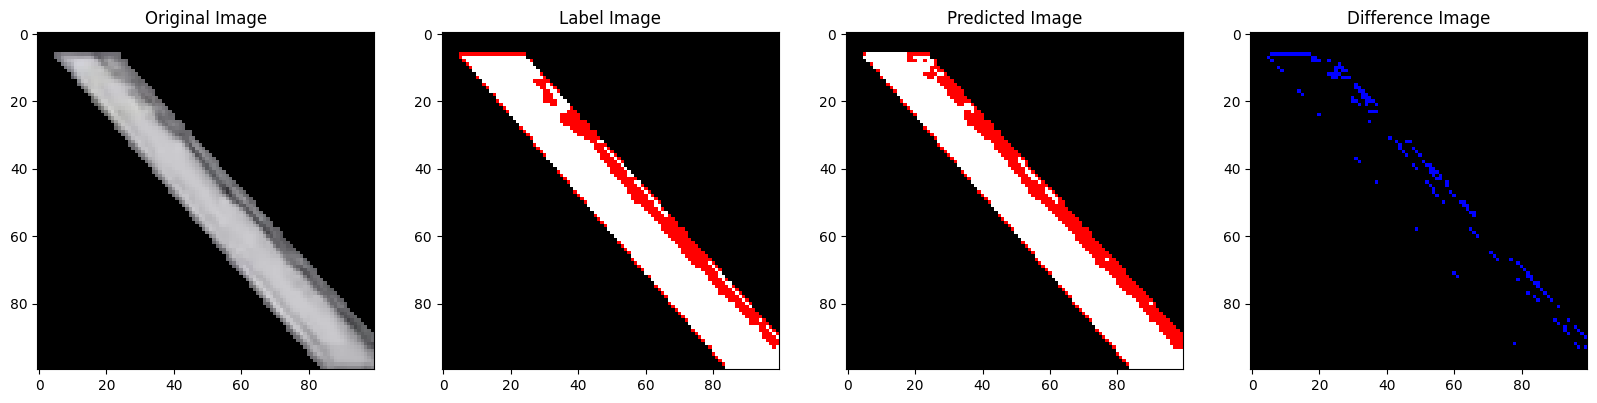

1/1 [==============================] - 0s 54ms/step


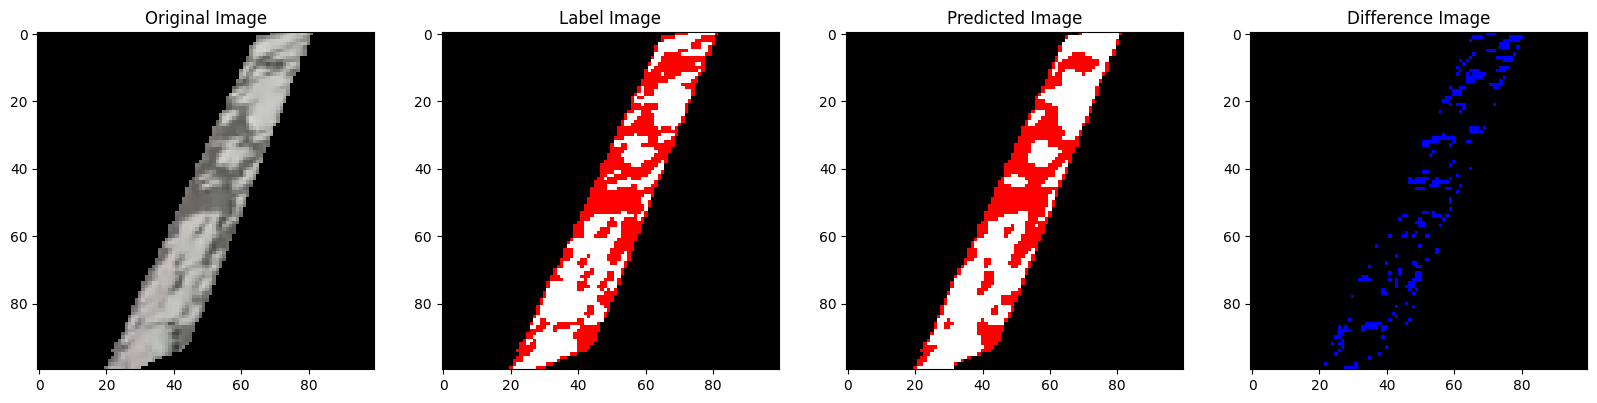

1/1 [==============================] - 0s 52ms/step


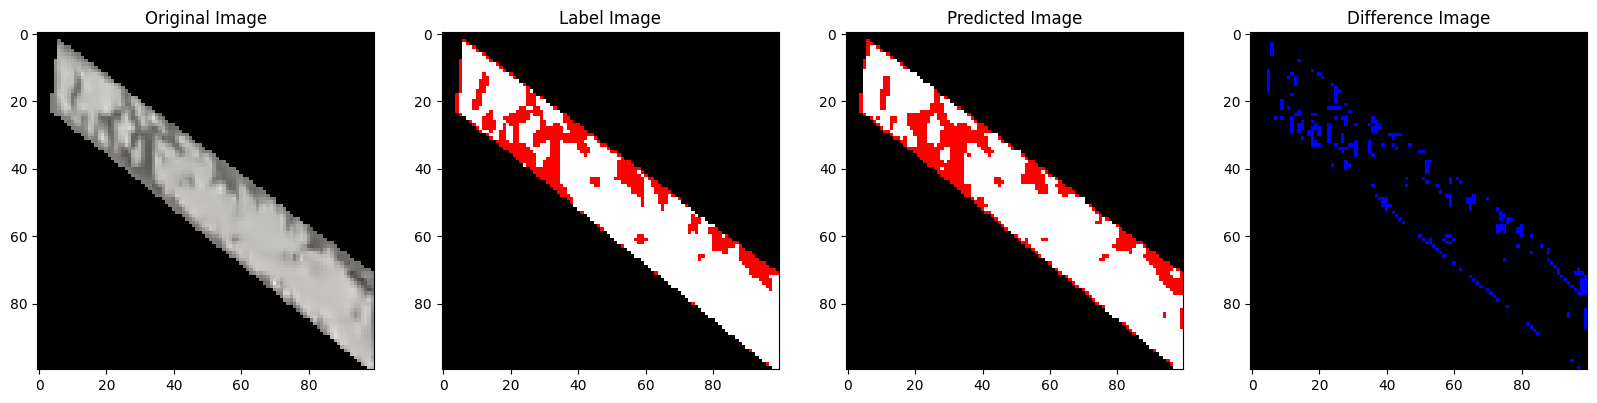

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import random


indices = random.sample(range(len(X_test)), 10)

for i in indices:
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    ax[0].imshow(X_test[i])
    ax[0].set_title('Original Image')

    label_img = np.zeros((y_test[i].shape[0], y_test[i].shape[1], 3), dtype=np.uint8)
    label_img[y_test[i] == 0] = [0, 0, 0]
    label_img[y_test[i] == 1] = [255, 0, 0]
    label_img[y_test[i] == 2] = [255, 255, 255]
    ax[1].imshow(label_img)
    ax[1].set_title('Label Image')

    pred = model.predict(np.expand_dims(X_test[i], axis=0))[0]
    pred_img = np.zeros((pred.shape[0], pred.shape[1], 3), dtype=np.uint8)
    pred_img[np.argmax(pred, axis=-1) == 0] = [0, 0, 0]
    pred_img[np.argmax(pred, axis=-1) == 1] = [255, 0, 0]
    pred_img[np.argmax(pred, axis=-1) == 2] = [255, 255, 255]
    ax[2].imshow(pred_img)
    ax[2].set_title('Predicted Image')

    diff_img = np.zeros((y_test[i].shape[0], y_test[i].shape[1], 3), dtype=np.uint8)
    diff_img[y_test[i] != np.argmax(pred, axis=-1)] = [0, 0, 255]
    ax[3].imshow(diff_img)
    ax[3].set_title('Difference Image')

    plt.show()
